# Flow Reactors 02

This notebook presents data that are typical of that obtained in differential packed bed reactors. We consider startup, transient phenomena, deactivation, and induction, and we consider strategies for quantifying a meaningful reaction rate when significant transients are observed during startup.


In [1]:
using DelimitedFiles
using Printf
using Polynomials
using CairoMakie
using LaTeXStrings
using JLD2
using DataFrames
using NumericalIntegration
using Dierckx
using Roots

In [2]:
#################################################################
#  Set of 4 Figure Themes for Makie/CairoMakie                  #
#################################################################

#################################################################
#  Defaults for linear axes x,y plots                           #
#################################################################

theme_linear = Theme(    
    
    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),
    
    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = identity,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(5),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = identity,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(5),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = false,
        xminorgridvisible  = false,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = false,
        yminorgridvisible  = false,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for log-log axes x,y plots                          #
#################################################################

theme_log = Theme(    

    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = log10,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(9),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = log10,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(9),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for log x/linear y plots                            #
#################################################################

theme_logx = Theme(    
    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = log10,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(9),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = identity,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(5),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)

#################################################################
#  Defaults for linear x/log y plots                            #
#################################################################

theme_logy = Theme(    

    #Figure Attributes
    backgroundcolor = "white", 
    font            = "Latin Modern Roman 17", 
    figure_padding  = 30,
    
    #Cycling attributes
    Scatter = (
        cycle = Cycle([[:linecolor, :markercolor, :color, :strokecolor] => :color, :marker], covary = true),
    ),

    #Axis attributes
    Axis = (
        
        #Font types
        titlefont          = "Latin Modern Roman 17",
        xlabelfont         = "Latin Modern Roman 17",
        xticklabelfont     = "Latin Modern Roman 17",
        ylabelfont         = "Latin Modern Roman 17",
        yticklabelfont     = "Latin Modern Roman 17",
        
        #Font sizes
        titlesize          = 30,
        xlabelsize         = 30,
        xticklabelsize     = 26,
        ylabelsize         = 30,
        yticklabelsize     = 26,
        
        #x axis properties
        xscale             = identity,
        xticksvisible      = true,
        xtickalign         = 1,
        xminorticks        = IntervalsBetween(5),
        xminorticksvisible = true,
        xminortickalign    = 1,
        xticksize          = 8.0,
        xtickwidth         = 1.5,
        xminorticksize     = 4.0,
        xminortickwidth    = 1.2,
        
        #y axis properties
        yscale             = log10,
        yticksvisible      = true,
        ytickalign         = 1,
        yminorticks        = IntervalsBetween(9),
        yminorticksvisible = true,
        yminortickalign    = 1,
        yticksize          = 8.0,
        ytickwidth         = 1.5,
        yminorticksize     = 4.0,
        yminortickwidth    = 1.2,
        
        #x grid properties
        xgridvisible       = true,
        xminorgridvisible  = true,
        xgridstyle         = :solid,
        xminorgridstyle    = :dot,
        xgridcolor         = "gray50",
        xminorgridcolor    = "gray80",
        xgridwidth         = 0.5,
        xminorgridwidth    = 0.5,
        
        #y grid properties
        ygridvisible       = true,
        yminorgridvisible  = true,
        ygridstyle         = :solid,        
        yminorgridstyle    = :dot,
        ygridcolor         = "gray50",
        yminorgridcolor    = "gray80",
        ygridwidth         = 0.5,
        yminorgridwidth    = 0.5,    
        
        #other axis properties
        spinewidth         = 1.0,
        aspect             = 1.0, 
     ),

    #Legend attributes
    Legend = (
        titlefont       = "Latin Modern Roman 17",
        labelfont       = "Latin Modern Roman 17",
        labelsize       = 17,
        framecolor      = (:black, 0.5), 
        backgroundcolor = :white
     )
)
;

## Example 02 - What Does Packed Bed Data Look Like?

Our undergraduate coursework would have us believe that estimating reaction rates and inferring turnover frequencies from a differential packed bed is as simple as waiting for steady state and measuring the change in species flowrates across the reactor.  In this case study, we look at several typical types of startup profiles that we observe in catalytic packed bed reactors operating under differential conditions.  We then ask the question: what is the reaction rate, and what is our turnover frequency?

We will stay with the example of the following gas-phase reaction:

$$A + B \longrightarrow C$$

Here, we test three catalysts at identical conditions of temperature, pressure, and composition--$\mathrm{Pt/SiO_2}$, $\mathrm{Ru/SiO_2}$, and $\mathrm{PtSn/SiO_2}$. We perform ex situ site titration with $CO$ and $H_2$ chemisorption, and we have good estimates of the exposed metal site count on each sample. Accordingly, we prepare each packed bed so that it has 10 moles of exposed active sites at the start of the experiment. We then start the reactor and measure effluent concentrations using a gas chromatograph, and we use those to calculate effluent flowrate of our product, species C.

In the graphs below, we plot the effluent flowrate of the reaction product, $F_C$, normalized by the quantity of active sites measured ex situ by chemisorption, $N_{S0}$. This is known as a "site time yield."  In the limit of a true differential reactor without catalyst deactivation or restructuring, the steady state site time yield is equal to the turnover frequency of the reaction.  Data were obtained from an external simulation and stored in a .csv file.  In all of these examples, we have ensured that transport phenomena are infinitely fast and that hydrodynamic transients dissapate very quickly. Accordingly, we are seeing transient phenomena that are related to the catalyst surface.

A final note: the data here ***is simulated***; however, the simulations were tuned so that trends reflect those that we have observed in lab on these same catalysts during probe reactions like the hydrogenation of acetone or propanoic acid.

In [3]:
######################################################################################
# Load startup data from .csv file                                                   #
######################################################################################

NS0 = 10
DATA1, HEADER1 = readdlm("FLOW_TRANSIENT_1.csv",  ',', Any, '\n', header = true)
DATA2, HEADER2 = readdlm("FLOW_TRANSIENT_2.csv",  ',', Any, '\n', header = true)
DATA3, HEADER3 = readdlm("FLOW_TRANSIENT_3.csv",  ',', Any, '\n', header = true)
DATA4, HEADER4 = readdlm("FLOW_TRANSIENT_4.csv",  ',', Any, '\n', header = true)
DATA5, HEADER5 = readdlm("FLOW_TRANSIENT_5.csv",  ',', Any, '\n', header = true)


# Ensure that numbers are formatted as Floating Point Decimals (64bit)
DATA1 = Float64.(DATA1); DATA2 = Float64.(DATA2); DATA3 = Float64.(DATA3); DATA4 = Float64.(DATA4); DATA5 = Float64.(DATA5)

# Assign meaningful labels to various experimental quantities from each data set.
t1   = DATA1[:, 1]; FA1 = DATA1[:, 2]; FB1 = DATA1[:, 3]; FC1 = DATA1[:, 4]; FP1 = DATA1[:, 5]; XA1 = DATA1[:, 6]; θA1 = DATA1[:, 7]; θB1 = DATA1[:, 8]; θC1 = DATA1[:, 9]; θP1 = DATA1[:, 10]; θV1 = DATA1[:, 11];
t2   = DATA2[:, 1]; FA2 = DATA2[:, 2]; FB2 = DATA2[:, 3]; FC2 = DATA2[:, 4]; FP2 = DATA2[:, 5]; XA2 = DATA2[:, 6]; θA2 = DATA2[:, 7]; θB2 = DATA2[:, 8]; θC2 = DATA2[:, 9]; θP2 = DATA2[:, 10]; θV2 = DATA2[:, 11]; 
t3   = DATA3[:, 1]; FA3 = DATA3[:, 2]; FB3 = DATA3[:, 3]; FC3 = DATA3[:, 4]; FP3 = DATA3[:, 5]; XA3 = DATA3[:, 6]; θA3 = DATA3[:, 7]; θB3 = DATA3[:, 8]; θC3 = DATA3[:, 9]; θP3 = DATA3[:, 10]; θV3 = DATA3[:, 11];
t4   = DATA4[:, 1]; FA4 = DATA4[:, 2]; FB4 = DATA4[:, 3]; FC4 = DATA4[:, 4]; FP4 = DATA4[:, 5]; XA4 = DATA4[:, 6]; θA4 = DATA4[:, 7]; θB4 = DATA4[:, 8]; θC4 = DATA4[:, 9]; θP4 = DATA4[:, 10]; θV4 = DATA4[:, 11];
t5   = DATA5[:, 1]; FA5 = DATA5[:, 2]; FB5 = DATA5[:, 3]; FC5 = DATA5[:, 4]; FP5 = DATA5[:, 5]; XA5 = DATA5[:, 6]; θA5 = DATA5[:, 7]; θB5 = DATA5[:, 8]; θC5 = DATA5[:, 9]; θP5 = DATA5[:, 10]; θV5 = DATA5[:, 11];

In [4]:
###########################################################################################
# Generate sub figures showing side by side comparison of startup behaviors               #
###########################################################################################

set_theme!(theme_linear)
figA = Figure(size = (1800, 600))
ax1  = Axis(figA[1,1], title = L"\mathrm{Pt/SiO_2}")
ax2  = Axis(figA[1,1], yaxisposition = :right, xaxisposition = :top)
ax3  = Axis(figA[1,2], title = L"\mathrm{Ru/SiO_2}")
ax4  = Axis(figA[1,2], yaxisposition = :right, xaxisposition = :top)
ax5  = Axis(figA[1,3], title = L"\mathrm{PtSn/SiO_2}")
ax6  = Axis(figA[1,3], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals_a  = (0, 1)
xtick_vals_a = collect(0:0.2:1)
ylim_vals_a  = (0, 3)
ytick_vals_a = collect(0:0.5:3)
xscale_val_a = identity
yscale_val_a = identity

xlim_vals_b  = (0, 5)
xtick_vals_b = collect(0:1:5)
ylim_vals_b  = (0, 3)
ytick_vals_b = collect(0:0.5:3)
xscale_val_b = identity
yscale_val_b = identity

xlim_vals_c  = (0, 10)
xtick_vals_c = collect(0:2:10)
ylim_vals_c  = (0, 10)
ytick_vals_c = collect(0:2:10)
xscale_val_c = identity
yscale_val_c = identity

ax1.xlabel = L"\mathrm{t \, (s)}"
ax1.ylabel = L"\mathrm{STY \, (s^{-1})}"
ax3.xlabel = L"\mathrm{t \, (s)}"
ax3.ylabel = L"\mathrm{STY \, (s^{-1})}"
ax5.xlabel = L"\mathrm{t \, (s)}"
ax5.ylabel = L"\mathrm{STY \, (s^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false
ax4.xticklabelsvisible = false
ax4.yticklabelsvisible = false
ax6.xticklabelsvisible = false
ax6.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals_a)
xlims!(ax2, xlim_vals_a)
xlims!(ax3, xlim_vals_b)
xlims!(ax4, xlim_vals_b)
xlims!(ax5, xlim_vals_c)
xlims!(ax6, xlim_vals_c)

ylims!(ax1, ylim_vals_a)
ylims!(ax2, ylim_vals_a)
ylims!(ax3, ylim_vals_b)
ylims!(ax4, ylim_vals_b)
ylims!(ax5, ylim_vals_c)
ylims!(ax6, ylim_vals_c)

ax1.xscale = xscale_val_a
ax2.xscale = xscale_val_a
ax3.xscale = xscale_val_b
ax4.xscale = xscale_val_b
ax5.xscale = xscale_val_c
ax6.xscale = xscale_val_c

ax1.yscale = yscale_val_a
ax2.yscale = yscale_val_a
ax3.yscale = yscale_val_b
ax4.yscale = yscale_val_b
ax5.yscale = yscale_val_c
ax6.yscale = yscale_val_c

ax1.xticks = xtick_vals_a
ax2.xticks = xtick_vals_a
ax3.xticks = xtick_vals_b
ax4.xticks = xtick_vals_b
ax5.xticks = xtick_vals_c
ax6.xticks = xtick_vals_c

ax1.yticks = ytick_vals_a
ax2.yticks = ytick_vals_a
ax3.yticks = ytick_vals_b
ax4.yticks = ytick_vals_b
ax5.yticks = ytick_vals_c
ax6.yticks = ytick_vals_c

scatter!(ax1, t1, FC1, marker = :circle, markersize = 15, label = "Pt/SiO₂", strokewidth = 1, strokecolor = :blue, color = (:white, 0.0))
scatter!(ax3, t2, FC2, marker = :rect, markersize = 15, label = "Ru/SiO₂", strokewidth = 1, strokecolor = :red, color = (:white, 0.0))
scatter!(ax5, t4, FC4/NS0, marker = :diamond, label = "PtSn/SiO₂", markersize = 15, strokewidth = 1, strokecolor = :green, color = (:white, 0.0))
# axislegend(ax1, position = :rt, framevisible = true)
# axislegend(ax3, position = :rt, framevisible = true)
# axislegend(ax5, position = :rb, framevisible = true)

Label(figA[1, 1, TopLeft()],
    "a)",
    fontsize = 22,
    font = "Latin Modern Roman",
    padding = (00, 40, 20, 0),
    halign = :right
)

Label(figA[1, 2, TopLeft()],
    "b)",
    fontsize = 22,
    font = "Latin Modern Roman",
    padding = (00, 40, 20, 0),
    halign = :right
)

Label(figA[1, 3, TopLeft()],
    "c)",
    fontsize = 22,
    font = "Latin Modern Roman",
    padding = (00, 40, 20, 0),
    halign = :right
)

CairoMakie.activate!(type = "svg")
# display(figA)
save("figA.svg", figA)
;

<img src="figA.svg"
     style="width: 100%;" />

### Dynamics in Flow Reactors

With these visualizations in mind, we now would like to determine which is the most active catalyst and why. Let's start the analysis by considering the observed dynamics of the $\mathrm{Pt/SiO_2}$ catalyst.  We'll then work through similar analyses for the remaining two catalysts.

Our goal in all of this is to provide a confident estimate of the turnover frequency (rate per unit active site) so that we can begin to quantify and understand the differences between the various materials.

In [5]:
###########################################################
# Generate a graph of FC vs. time on Pt/SiO2              #
###########################################################

set_theme!(theme_linear)
fig1 = Figure(size = (600, 600))
ax1  = Axis(fig1[1,1])
ax2  = Axis(fig1[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 1)
xtick_vals = collect(0:0.25:1.0)
ylim_vals  = (0, 3.0)
ytick_vals = collect(0:0.5:3.0)
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{t \, (s)}"
ax1.ylabel = L"\mathrm{STY \, (s^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, t1, FC1, marker = :circle, markersize = 15, label = "Pt/SiO₂", strokewidth = 1, strokecolor = :blue, color = (:white, 0.0))
axislegend(ax1, position = :rt, framevisible = true)
save("PtSiO2Dynamics.svg", fig1)
CairoMakie.activate!(type = "svg")
;

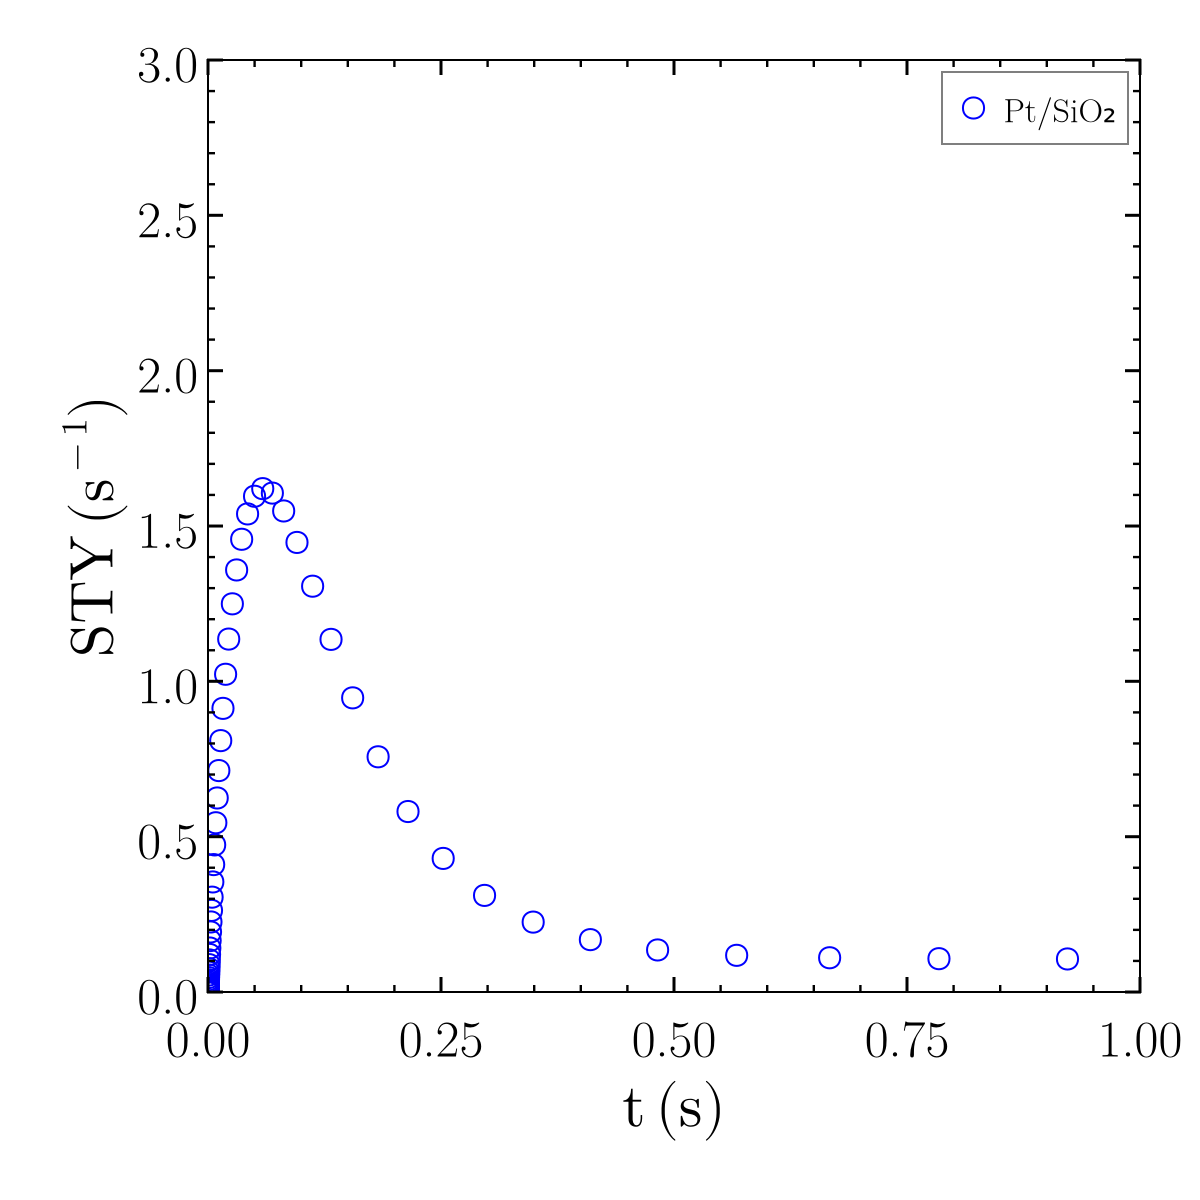

At Steady State, over Pt/SiO₂, we observe: 


FA = 1.00E+05 s⁻¹ 
FB = 2.00E+05 s⁻¹ 
FC = 0.106 s⁻¹ 
XA = 1.06E-06 
r  ≈ 0.106 s⁻¹

In [6]:
###########################################################
# Displaying startup profile for Pt/SiO2                  #
###########################################################

display(fig1)
@printf("At Steady State, over Pt/SiO₂, we observe: \n")
@printf("FA = %3.2E s⁻¹ \n", FA1[end])
@printf("FB = %3.2E s⁻¹ \n", FB1[end])
@printf("FC = %3.3f s⁻¹ \n", FC1[end])
@printf("XA = %3.2E \n", XA1[end])
@printf("r  ≈ %3.3f s⁻¹", FC1[end])
;

## Interpretation

The question that I ask when I see data like this is whether my catalyst takes a long time to get to steady state (and there are a lot of transient ups and downs during that time period), or whether my catalyst is deactivating aggressively, so that by the time it appears to be at "steady state," the observed activity is a fraction of the true intrinsic activity.  It can be very hard to tell from a single experiment, and, as ever, I would recommend a few things here:

1. Replicates.  Regenerate the catalyst in situ and run sequential experiments. This is a good test for whether the phenomena are reversible and repeatable.
2. Post mortem characterization. This is not definitive as one usually must remove the catalyst from reaction conditions to characterize, but it is useful.
3. Quantification of turnover numbers vs. time on stream.

The turnover number is a useful concept.  It represents how many catalytic cycles have occurred per unit active site.  It is also relatively easy to calculate. One need only divide the total quantity of products formed by the total number of active sites present in the reactor. Without a way to quantify changes in the number of active sites as a function of time on stream, we use the ex situ estimate for active site density here.

$$\mathrm{TON} = \int_0^t \frac{F_C}{N_{S0}}dt$$

In [7]:
################################################
# Calculating TON vs. time on stream           #
################################################

TON1 = cumul_integrate(t1, FC1)

#Interpolating polynomial gives a continuous approximation of TON(t)
TONspl1 = Spline1D(TON1, t1);

In [8]:
################################################
# Create a graph of TON vs time on stream      #
################################################

set_theme!(theme_linear)
fig4 = Figure(size = (600, 600))
ax1  = Axis(fig4[1,1])
ax2  = Axis(fig4[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 1)
xtick_vals = collect(0:0.25:1.0)
ylim_vals  = (0, 1)
ytick_vals = collect(0:0.2:1)
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{t \, (s)}"
ax1.ylabel = L"\mathrm{TON}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals
scatter!(ax1, t1, TON1, label = "Pt/SiO₂", marker = :circle, markersize = 15, strokewidth = 1, strokecolor = :blue, color = (:white, 0.0))
axislegend(ax1, position = :rt, framevisible = true)
save("PtTON1.svg", fig4)
CairoMakie.activate!(type = "svg")
;

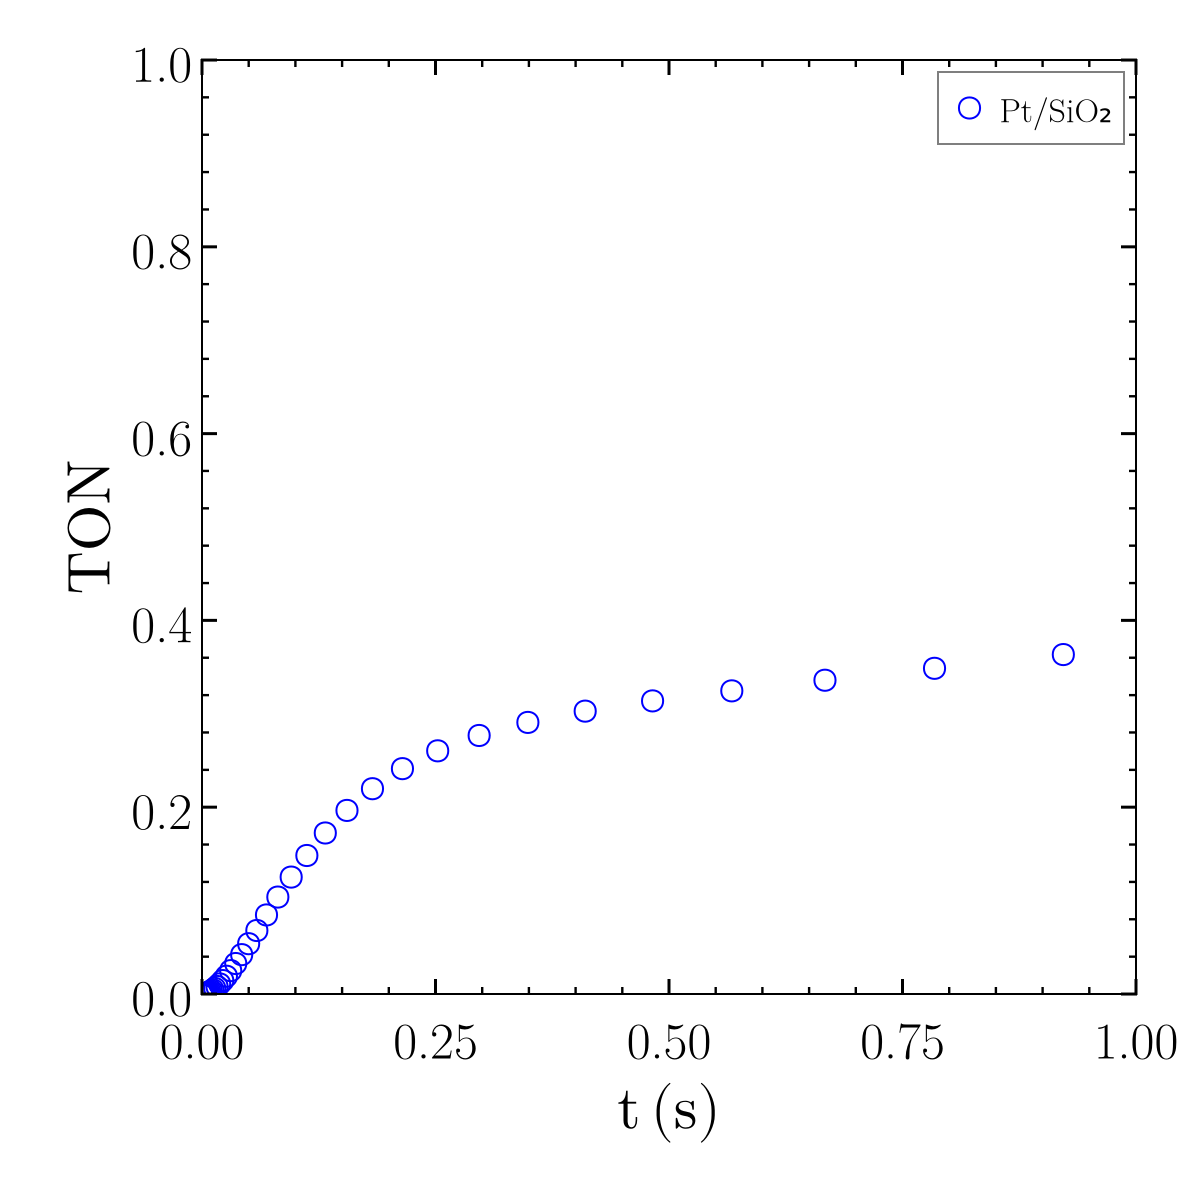

In [9]:
###################################################
# Display TON Figure                              #
###################################################
display(fig4);

### Observations

The main thing that we notice here is that after 1 second on stream, we have only reached a Turnover number of approximately 0.4.  This means that not all of our sites have turned over yet, so it is hard to claim that the catalyst has reached steady state surface coverages and reaction rates.  A telltale sign of a reactor at steady state is that turnover number increases linearly with time on stream. It does not look like we have quite reached that state yet, so we should allow a longer startup to see when/if our catalyst reaches steady state.

In [10]:
##########################################################
# Graph TON data to longer time on stream                #
##########################################################

set_theme!(theme_linear)
fig5 = Figure(size = (600, 600))
ax1  = Axis(fig5[1,1])
ax2  = Axis(fig5[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 10)
xtick_vals = collect(0:2:10)
ylim_vals  = (0, 2)
ytick_vals = collect(0:0.5:2)
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{t \, (s)}"
ax1.ylabel = L"\mathrm{TON}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, t1, TON1, label = "Pt/SiO₂", marker = :circle, markersize = 15, strokewidth = 1, strokecolor = :blue, color = (:white, 0.0))
hlines!(ax1, 1.0, 0, 10, color = :black, linestyle = :dash)
scatter!(ax1, TONspl1(1.0), 1.0, marker = :circle, markersize = 15, strokewidth = 1, strokecolor = :red, color = (:white,0.0))
axislegend(ax1, position = :rt, framevisible = true)
save("PtTON2.svg", fig5)

CairoMakie.activate!(type = "svg")
;

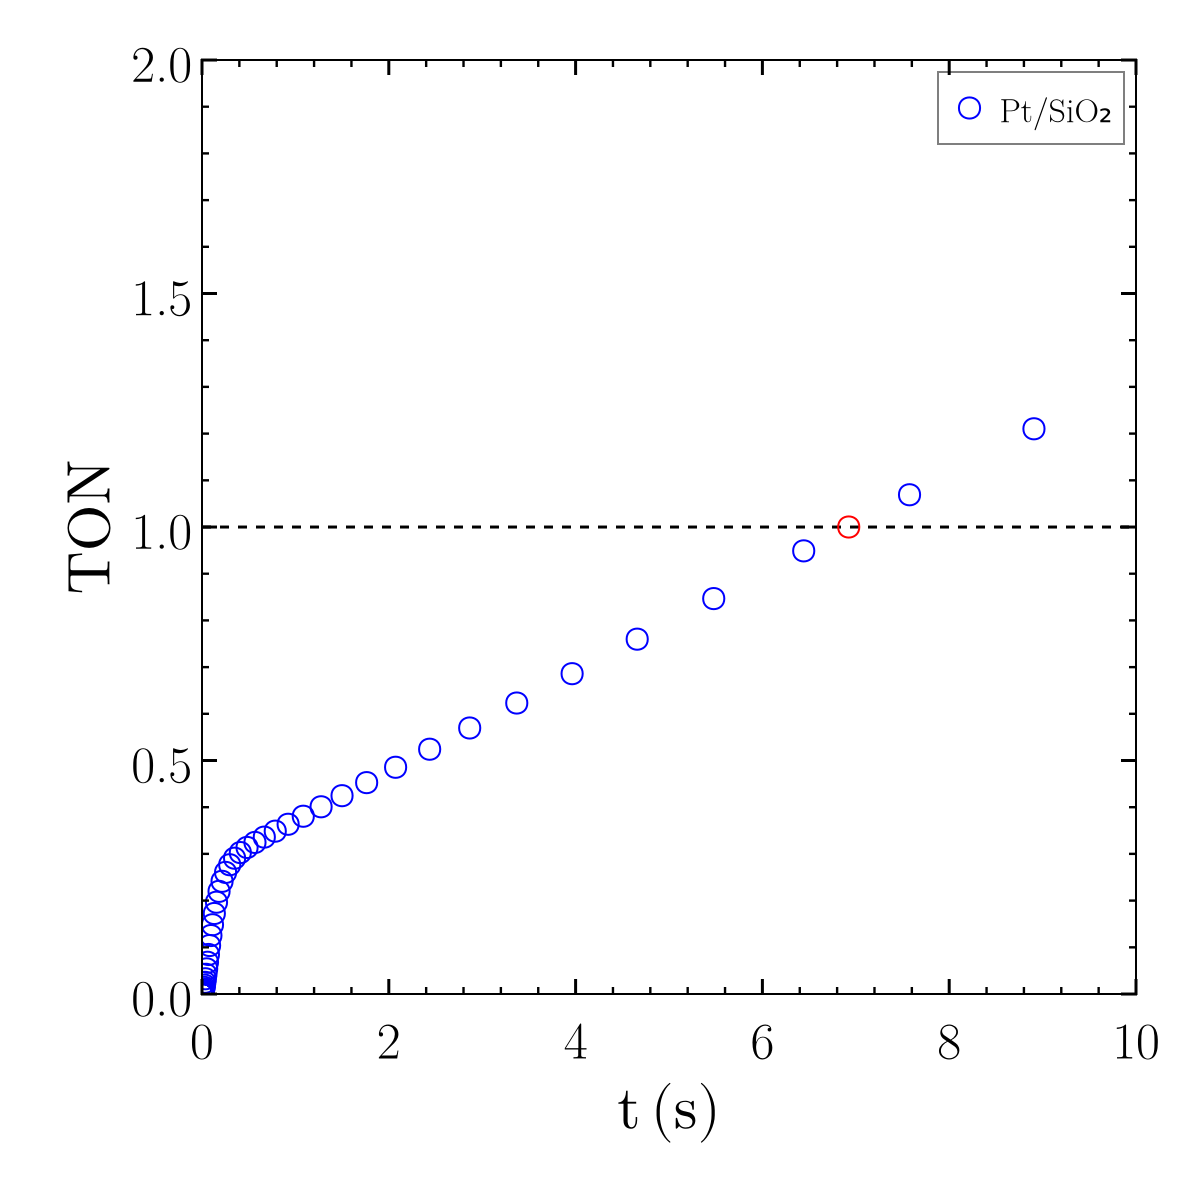

In [11]:
##########################################################
# Display TON vs time on stream to 10 s                  #
##########################################################

display(fig5);

### Observations

From this figure, we see that all sites have turned over after approximately 7 seconds on stream. If the system achieves a full turnover, it suggests that it has been on stream long enough to reach steady state coverages and reaction rates.  We also see that TON is linear in time after a few seconds on stream. The slope of this line is equal to the turnover frequency of the reaction.

In [12]:
##################################################################################
# Plot startup of Pt/SiO2 showing time point where we are likely at steady state #
##################################################################################

set_theme!(theme_linear)
fig6 = Figure(size = (600, 600))
ax1  = Axis(fig6[1,1])
ax2  = Axis(fig6[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 10)
xtick_vals = 0:2:10.0
ylim_vals  = (0, 3.0)
ytick_vals = 0:0.5:3.0
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{t \, (s)}"
ax1.ylabel = L"\mathrm{STY \, (s^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, t1, FC1, label = "Pt/SiO₂", marker = :circle, markersize = 15, strokewidth = 1, strokecolor = :blue, color = (:white, 0.0))
vlines!(ax1, TONspl1(1.0), 0, 3.0, color = :black, linestyle = :dash)
axislegend(ax1, position = :rt, framevisible = true)
save("PtSiO2Dynamics2.svg", fig6)

CairoMakie.activate!(type = "svg")
TOF1    = fit(t1[end-10:end], TON1[end-10:end], 1)[1];

For Catalyst 1, our best estimate of a TOF is r ≈ 0.106 s⁻¹ 


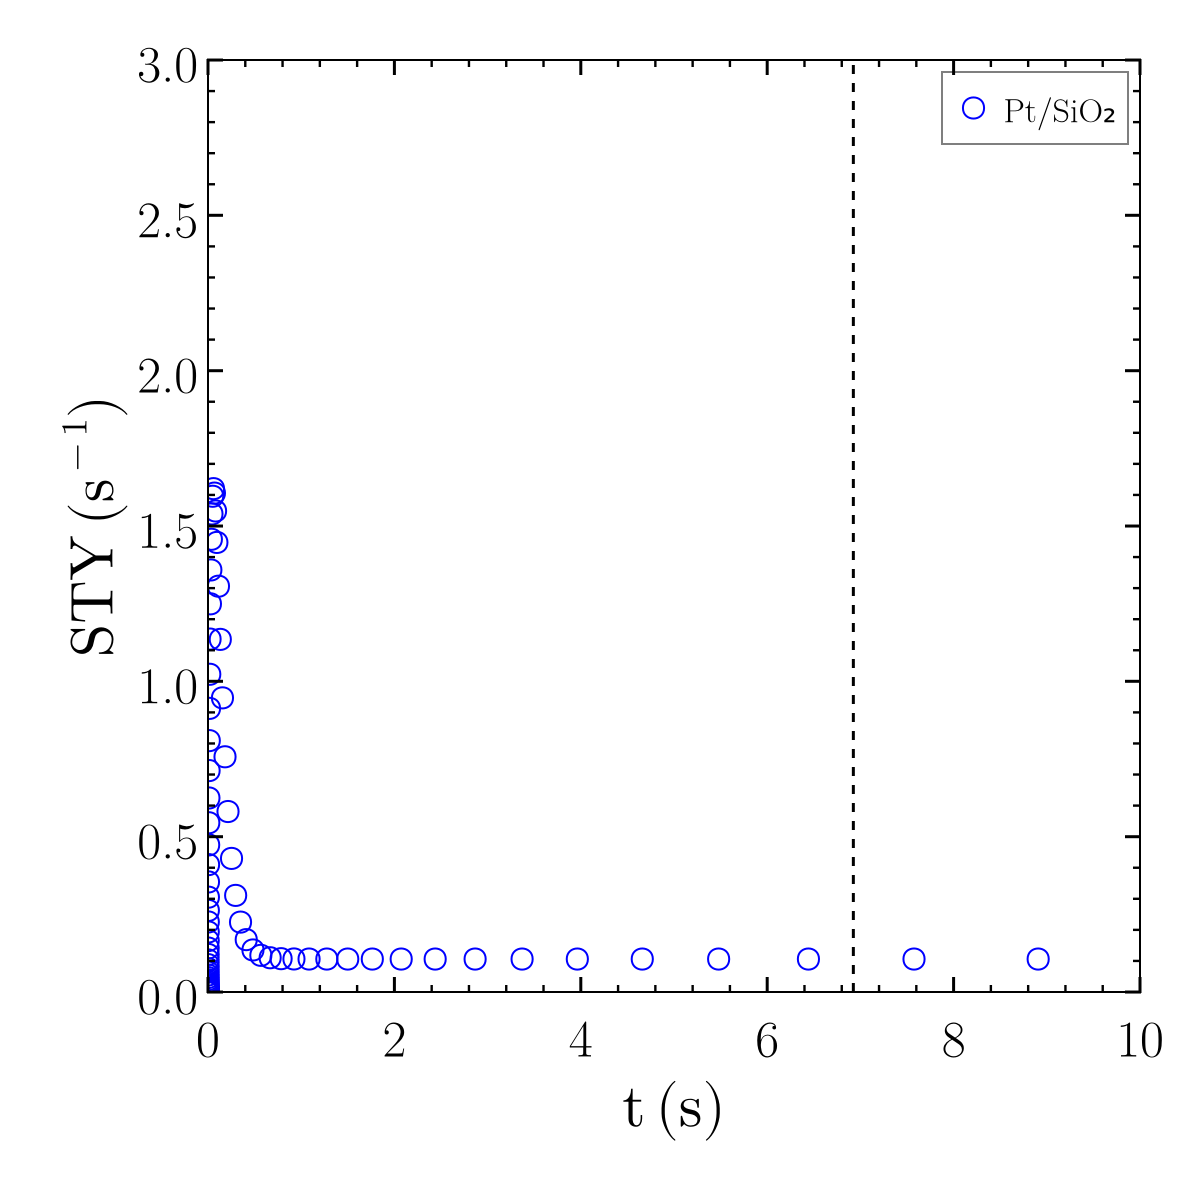

In [13]:
@printf("For Catalyst 1, our best estimate of a TOF is r ≈ %3.3f s⁻¹ \n", TOF1[end])
display(fig6);

One might also note here that the true turnover frequency for this reaction given by simulation data is 0.106 inverse seconds.  Inverting that turnover frequency gives a time scale of roughly 10 seconds, which is the time scale over which this particular system is observed to reach steady state.  They are not exactly equivalent, as steady state is really determined by when the coverages of species participating in the RDS become time invariant, but the two should roughly agree. Generally, one might see a system reach steady state faster than the time scale indicated by inverse turnover frequency, but it should not take longer than this time scale to reach steady state.

## Startup of packed bed with $\mathrm{Ru/SiO_2}$

Next we perform an analogous assessment of the $\mathrm{Ru/SiO_2}$ catalyst.

In [14]:
######################################################################
# Generate figure of FC/NS0 vs. time on stream for Ru/SiO2           #
######################################################################

set_theme!(theme_linear)
fig2 = Figure(size = (600, 600))
ax1  = Axis(fig2[1,1])
ax2  = Axis(fig2[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 5)
xtick_vals = collect(0:1:5.0)
ylim_vals  = (0, 3)
ytick_vals = collect(0:0.5:3.0)
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{t \, (s)}"
ax1.ylabel = L"\mathrm{STY \, (s^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, t2, FC2, marker = :rect, markersize = 15, label = "Ru/SiO₂", strokewidth = 1, strokecolor = :red, color = (:white, 0.0))
axislegend(ax1, position = :rt, framevisible = true)
CairoMakie.activate!(type = "svg")
save("RuSiO2Dynamics.svg", fig2)
;

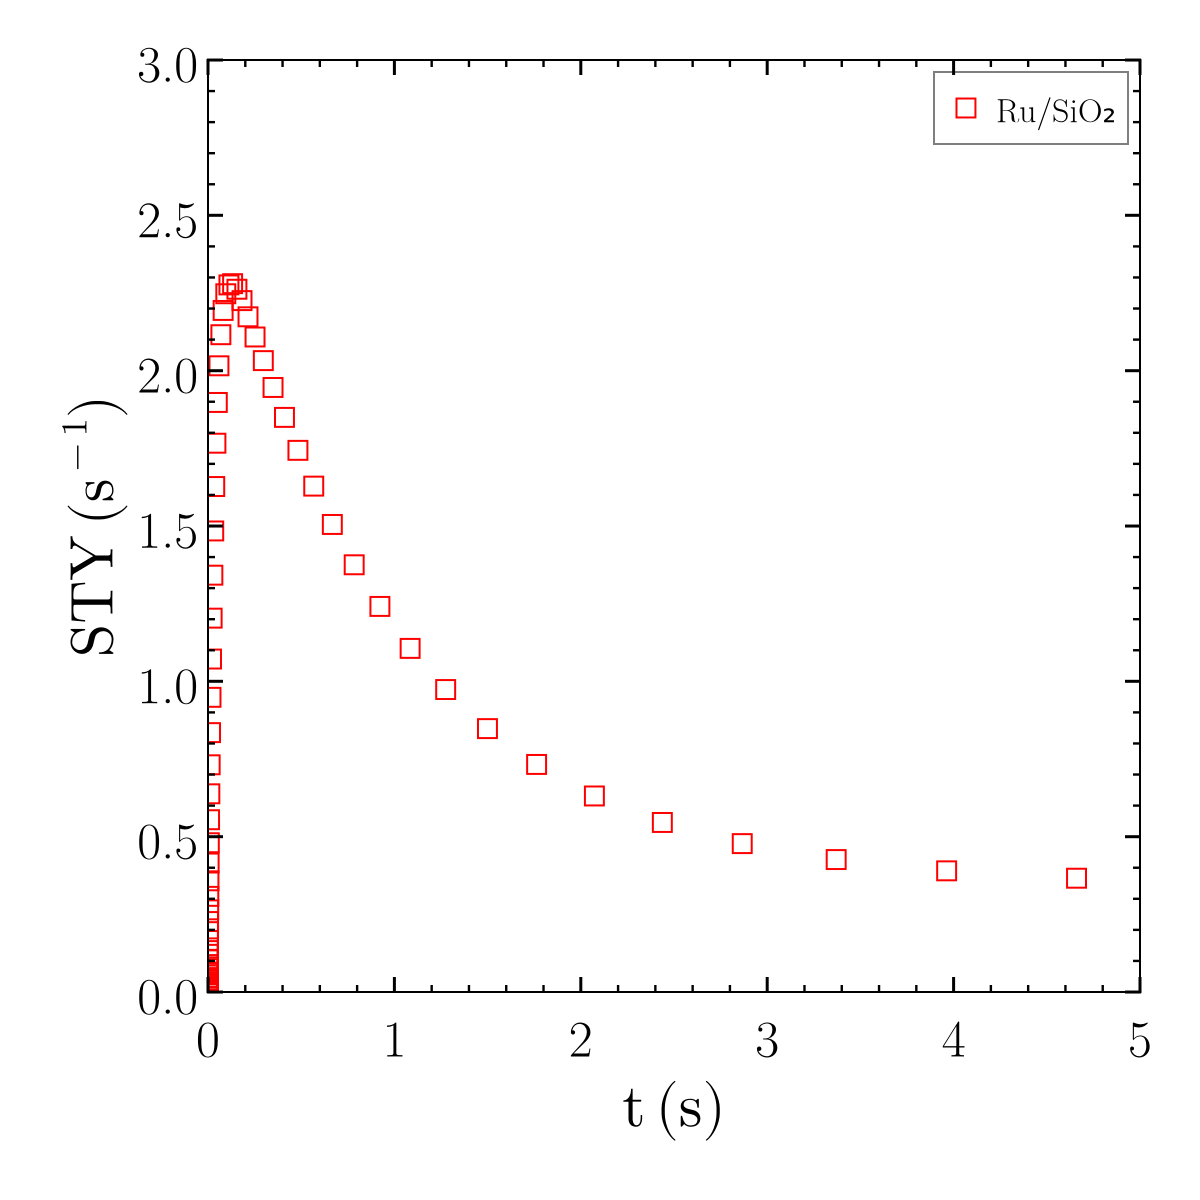

At Steady State, over Ru/SiO₂, we observe: 


FA = 1.00E+05 s⁻¹ 
FB = 2.00E+05 s⁻¹ 
FC = 0.339 s⁻¹ 
XA = 3.39E-06 


r  ≈ 0.339 s⁻¹

In [15]:
##########################################################################
# Display figure and some observations about species flowrates           #
##########################################################################

display(fig2)
@printf("At Steady State, over Ru/SiO₂, we observe: \n")
@printf("FA = %3.2E s⁻¹ \n", FA2[end])
@printf("FB = %3.2E s⁻¹ \n", FB2[end])
@printf("FC = %3.3f s⁻¹ \n", FC2[end])
@printf("XA = %3.2E \n", XA2[end])
@printf("r  ≈ %3.3f s⁻¹", FC2[end])

### Observations

Here I would ask the same questions about time scales to steady state and the potential impacts of catalyst deactivation. We can assess quickly by looking at the steady state "site time yield" of 0.339 inverse seconds.  Inverting that number gives a time scale of 3 seconds. If this is the true turnover frequency, I would expect that my system had reached steady state within 3 seconds, but the data indicate otherwise. This suggests perhaps something beyond anticipated transients in surface coverage is causing these dynamics. We again check the turnover number.

In [16]:
#############################################################
# Calculate TON vs. TOS                                     #
#############################################################

TON2 = cumul_integrate(t2, FC2)
TONspl2 = Spline1D(TON2, t2)

# Linear regression of last 10 data points; estimate of sty at steady state
TOF2    = fit(t2[end-10:end], TON2[end-10:end], 1)[1];

In [17]:
##########################################################
# Generate Graph of TON vs. TOS; hline where TON = 1     #
##########################################################

set_theme!(theme_linear)
fig7 = Figure(size = (600, 600))
ax1  = Axis(fig7[1,1])
ax2  = Axis(fig7[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 5)
xtick_vals = collect(0:1:5.0)
ylim_vals  = (0, 4)
ytick_vals = collect(0:1:4)
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{t \, (s)}"
ax1.ylabel = L"\mathrm{TON}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, t2, TON2, label = "Ru/SiO₂", marker = :rect, markersize = 15, strokewidth = 1, strokecolor = :red, color = (:white, 0.0))
hlines!(ax1, 1.0, 0, 10, color = :black, linestyle = :dash)
scatter!(ax1, TONspl2(1.0), 1.0, marker = :rect, markersize = 15, strokewidth = 1, strokecolor = :blue, color = (:white,0.0))
axislegend(ax1, position = :lt, framevisible = true)
CairoMakie.activate!(type = "svg")
save("RuTON1.svg", fig7)
;

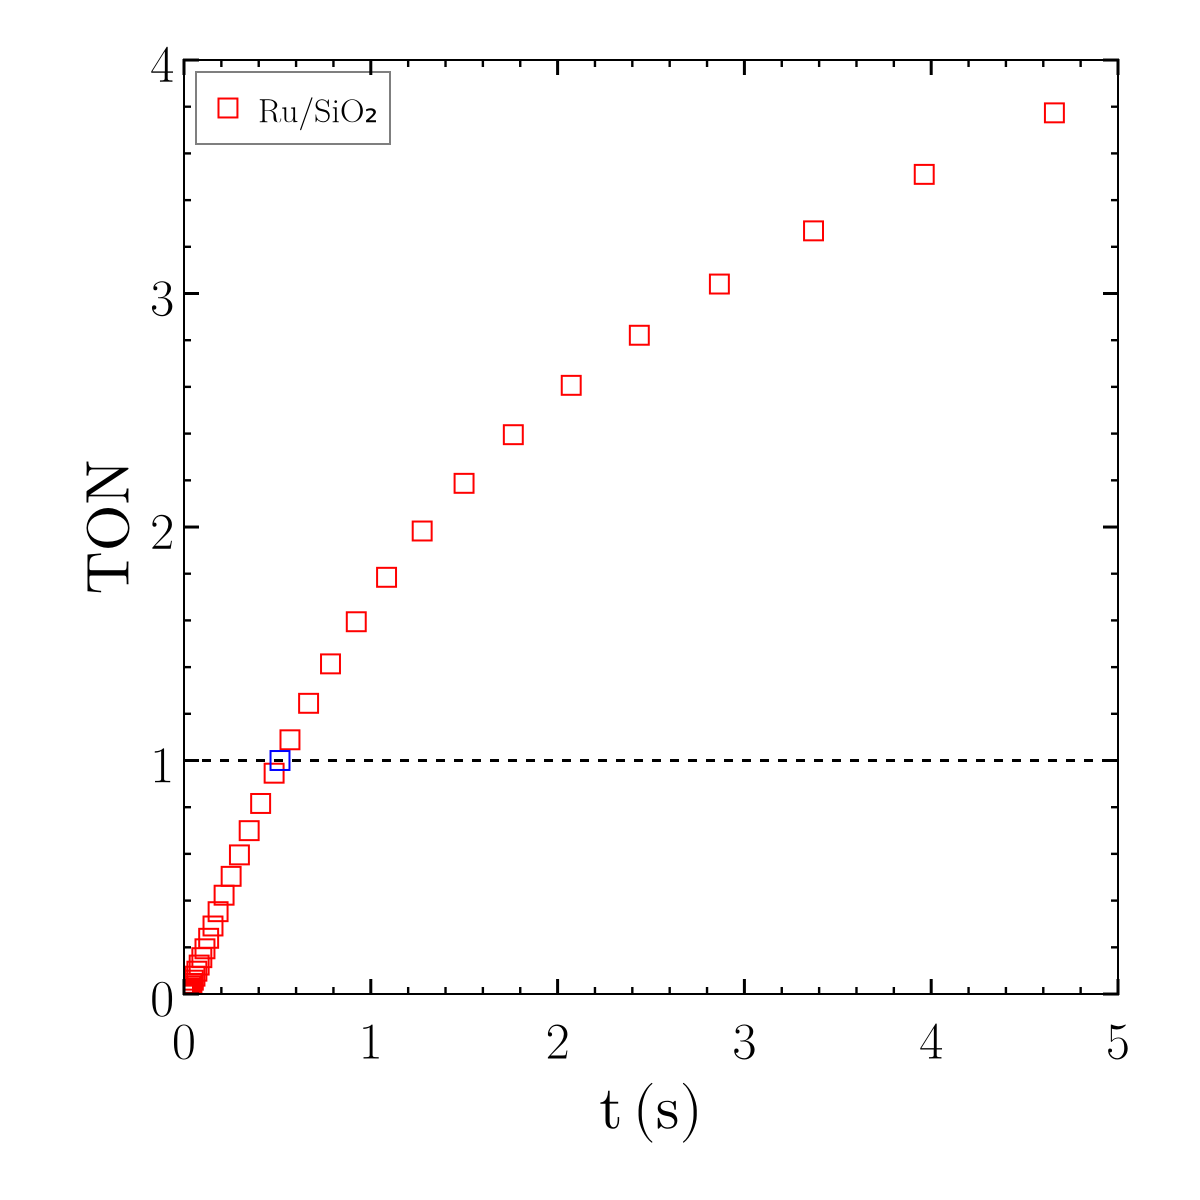

In [18]:
#########################################################
# Display graph of TON vs. time on stream               #
#########################################################

display(fig7);

### Interpreting the TON behavior

We see a few important things here.  First, the TON is linear in time almost instantly, which suggests the system reached steady state early. Second, we see the system reaches a TON of 1 (all sites have turned over) by roughly 0.6 seconds. This suggests that the system should have reached steady state by ~ 0.5 - 1 seconds, but it hasn't. Finally, as we look at TON vs time at longer times on stream, we see that the TON is not linear in time. Rather, the slope of the line has begun to decrease (negative second derivative). This is a pretty clear indication that there is some loss of activity happening under reaction conditions, i.e., the catalyst is deactivating.

We go back to the plot of site time yield vs time:

In [19]:
###############################################################################
# Generate graph of STY vs. time; show time where TON = 1                     #
###############################################################################

set_theme!(theme_linear)
fig8 = Figure(size = (600, 600))
ax1  = Axis(fig8[1,1])
ax2  = Axis(fig8[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 5)
xtick_vals = collect(0:1:5.0)
ylim_vals  = (0, 3.0)
ytick_vals = collect(0:0.5:3.0)
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{t \, (s)}"
ax1.ylabel = L"\mathrm{STY \, (s^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, t2, FC2, label = "Ru/SiO₂", marker = :rect, markersize = 15, strokewidth = 1, strokecolor = :red, color = (:white, 0.0))
vlines!(ax1, TONspl2(1.0), 0, 2.5, color = :black, linestyle = :dash)
axislegend(ax1, position = :rt, framevisible = true)
save("RuSiO2Dynamics2.svg", fig8)
CairoMakie.activate!(type = "svg")
;

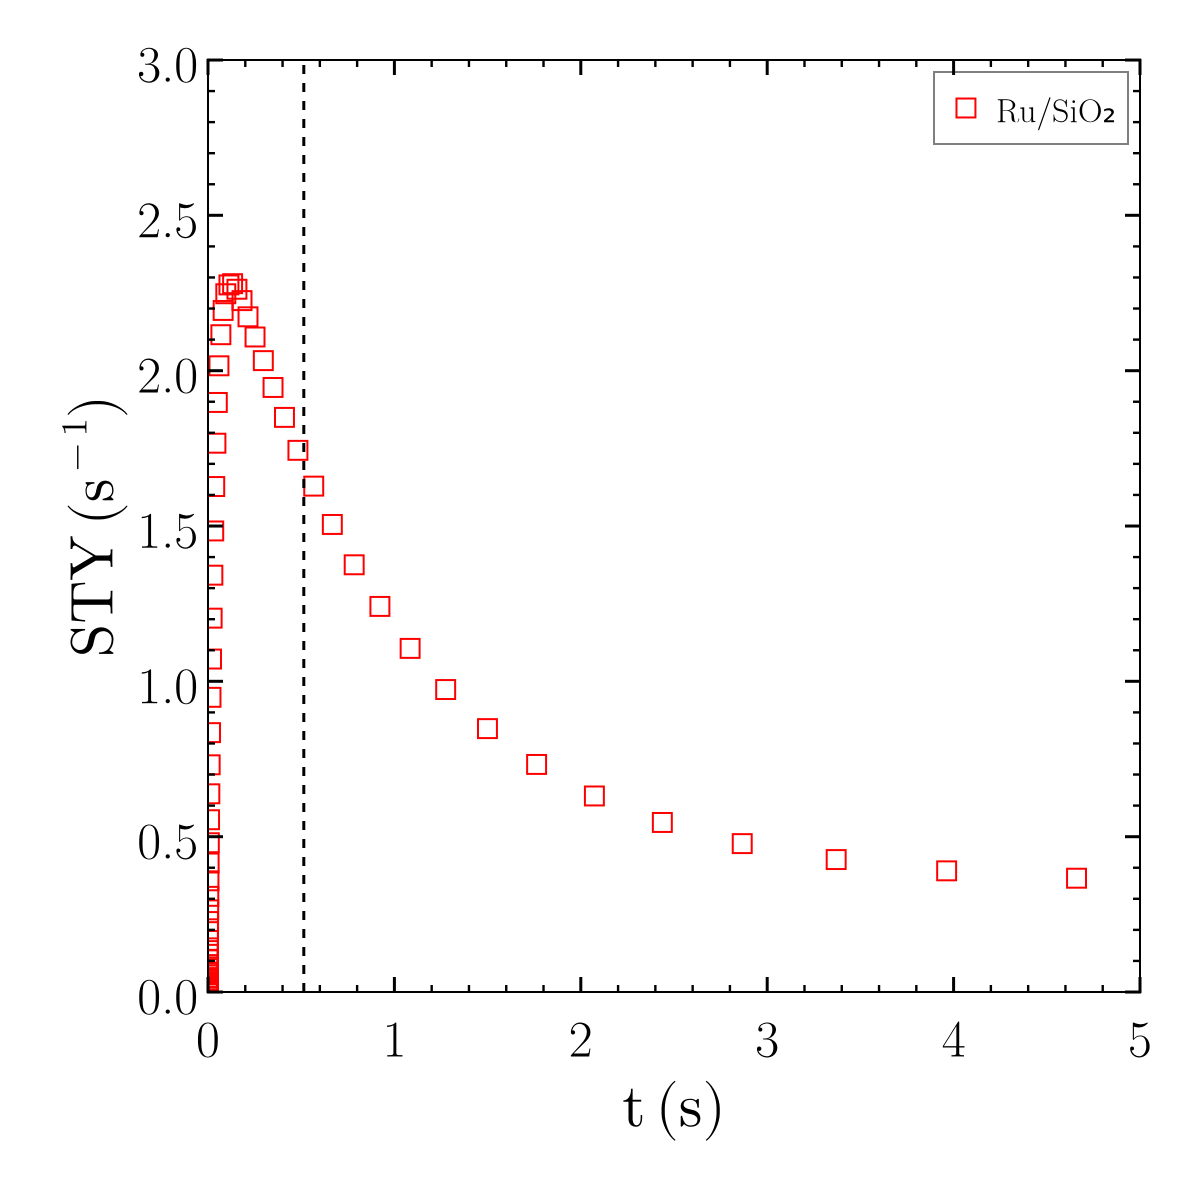

In [20]:
###############################################
# Display graph of TON vs. time               #
###############################################
display(fig8);

### Possible analysis methods

We can try to do a few things here.  The crux of the problem is that we are doing a reasonble job of measuring the extensive flowrate of species C leaving the reactor, but we are uncertain about the number and/or nature of active sites as a function of time -- they appear to be decreasing in quantity and/or activity as time elapses.

1. Trust $N_{S0}$; extrapolate decay profile to zero time on stream (initial rate).
2. Try to quantify $N_S$ at steady state in situ (add poisons, operando spectroscopy, SSITKA).
3. Post mortem characterization to understand sites remaining at steady state (note, characterization is not under reaction conditions).

We will focus on the first method here and then employ the remaining two in the last case study.

A caveat when doing this is that one must be confident that the reactor operates differentially throughout the deactivation and startup; otherwise, this analysis is flawed.

In [21]:
#####################################################################
# Generate graph of STY vs. time on stream with extrapolation       #
#####################################################################

set_theme!(theme_linear)
fig8 = Figure(size = (600, 600))
ax1  = Axis(fig8[1,1])
ax2  = Axis(fig8[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 1)
xtick_vals = collect(0:0.2:1)
ylim_vals  = (0, 3.0)
ytick_vals = collect(0:0.5:3.0)
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{t \, (s)}"
ax1.ylabel = L"\mathrm{STY \, (s^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

f2 = fit(t3[(t3 .>= 0.2) .& (t3 .<= 0.4)], FC2[(t3 .>= 0.2) .& (t3 .<= 0.4)], 1)
scatter!(ax1, t2, FC2, label = "Ru/SiO₂", marker = :rect, markersize = 15, strokewidth = 1, strokecolor = :red, color = (:white, 0.0))
lines!(ax1, [0, 1], f2.([0, 1]),color = :blue, linestyle = :dash)
vlines!(ax1, TONspl2(1.0), 0, 2.5, color = :black, linestyle = :dash)
axislegend(ax1, position = :rt, framevisible = true)
save("RuSiO2Extrapolate.svg", fig8)
CairoMakie.activate!(type = "svg")
;

For Ru/SiO₂, we estimate a turnover frequency of 2.54 s⁻¹

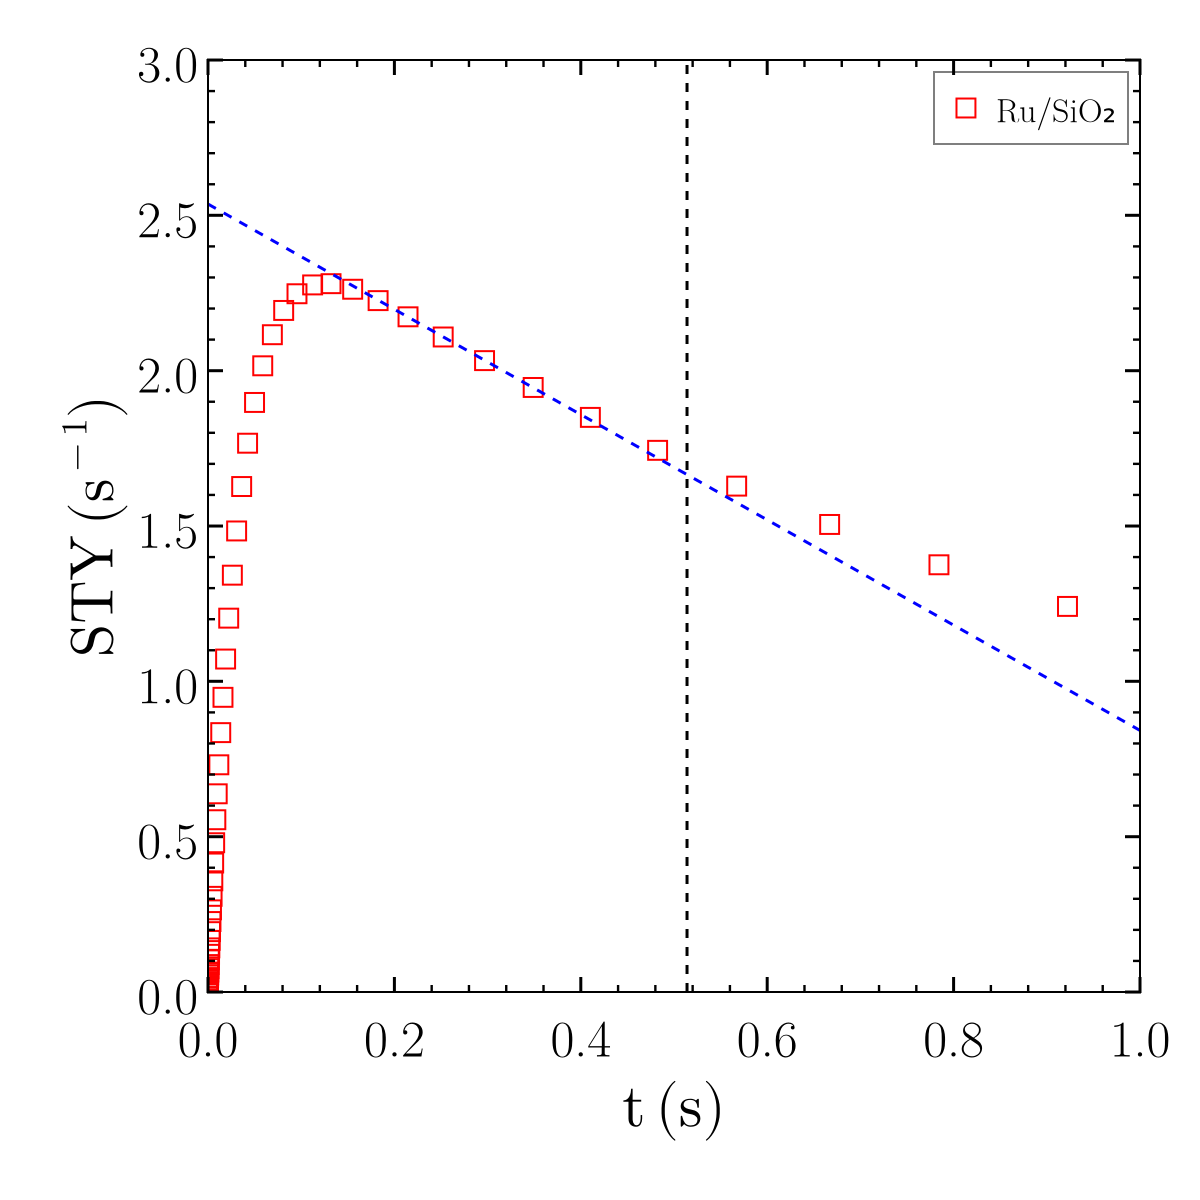

In [22]:
###########################################################################
# Display figure and y-intercept value                                    #
###########################################################################

@printf("For Ru/SiO₂, we estimate a turnover frequency of %3.2f s⁻¹", f2[0])
display(fig8);

## Comparison with the ideal case

For comparison, the cell below loads data, calculates a TON, and generates a graph of STY vs. time on stream for Ru/SiO2 when I turn off deactivation.

In [23]:
##################################################
# Calculate TON without deactivation             #
##################################################

TON3 = cumul_integrate(t3, FC3)
TONspl3 = Spline1D(TON3, t3);

In [24]:
##################################################
# Graph STY vs time on stream; show TON = 1      #
##################################################

set_theme!(theme_linear)
fig8 = Figure()
ax1  = Axis(fig8[1,1])
ax2  = Axis(fig8[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 5)
xtick_vals = collect(0:1:5.0)
ylim_vals  = (0, 3)
ytick_vals = collect(0:0.5:3)
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{t \, (s)}"
ax1.ylabel = L"\mathrm{STY \, (s^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, t3, FC3, label = "Ru/SiO₂ w/o deactivation", marker = :rect, markersize = 15, strokewidth = 1, strokecolor = :red, color = (:white, 0.0))
vlines!(ax1, TONspl3(1.0), 0, 2.5, color = :black, linestyle = :dash)
axislegend(ax1, position = :rb, framevisible = true)

CairoMakie.activate!(type = "svg")

#Regress slope of TON vs. time on stream after it is linear in time
TOF3    = fit(t3[end-10:end], TON3[end-10:end], 1)[1];

If we turn off deactivation, Ru/SiO₂ achieves a TOF of 2.68 s⁻¹

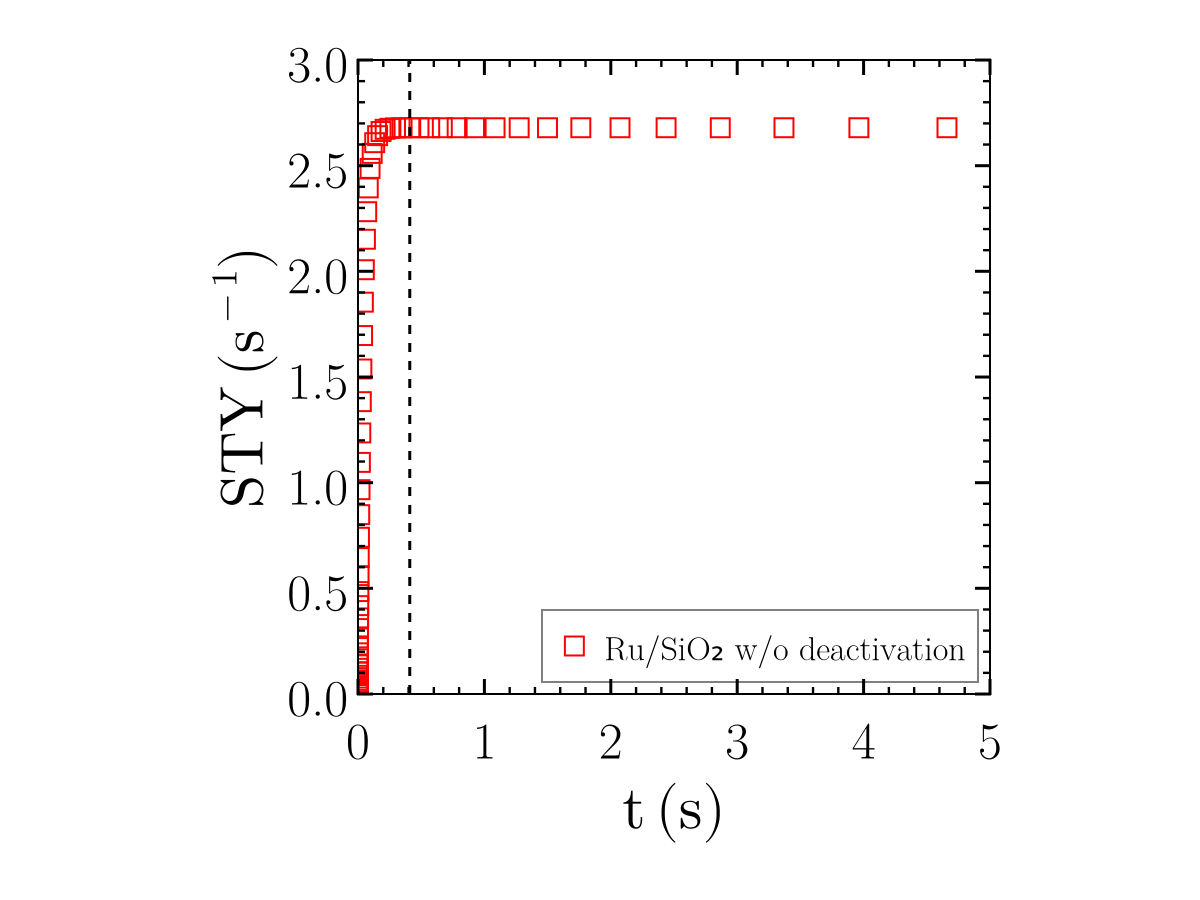

In [25]:
@printf("If we turn off deactivation, Ru/SiO₂ achieves a TOF of %3.2f s⁻¹", TOF3)
display(fig8);

### Observations

You can see that without deactivation, the catalyst turns over at a rate of 2.68 1/s, which is very close to the estimate we got by extrapolating the decay profile to zero time on stream.  You can also see that the system reaches steady state within roughly 0.5 seconds, which is similar to 1/TOF. We see that without deactivation, the site time yield is no longer changing once the system reaches TON = 1.

## $\mathrm{PtSn/SiO_2}$

Next, we will load the final case of a bimetallic catalyst and discuss some of the new complications that arise here.

In [26]:
##################################################################
# Generate graph of STY vs. time on stream for PtSn/SiO2         #
##################################################################

NS0 = 10 #moles of active sites
set_theme!(theme_linear)
fig3 = Figure(size = (600, 600))
ax1  = Axis(fig3[1,1])
ax2  = Axis(fig3[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 10)
xtick_vals = collect(0:2:10.0)
ylim_vals  = (0, 10)
ytick_vals = collect(0:2:10)
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{t \, (s)}"
ax1.ylabel = L"\mathrm{STY \, (s^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, t4, FC4/NS0, marker = :diamond, label = "PtSn/SiO₂", markersize = 15, strokewidth = 1, strokecolor = :green, color = (:white, 0.0))
axislegend(ax1, position = :rt, framevisible = true)
save("PtSnDynamics.svg", fig3)
CairoMakie.activate!(type = "svg")

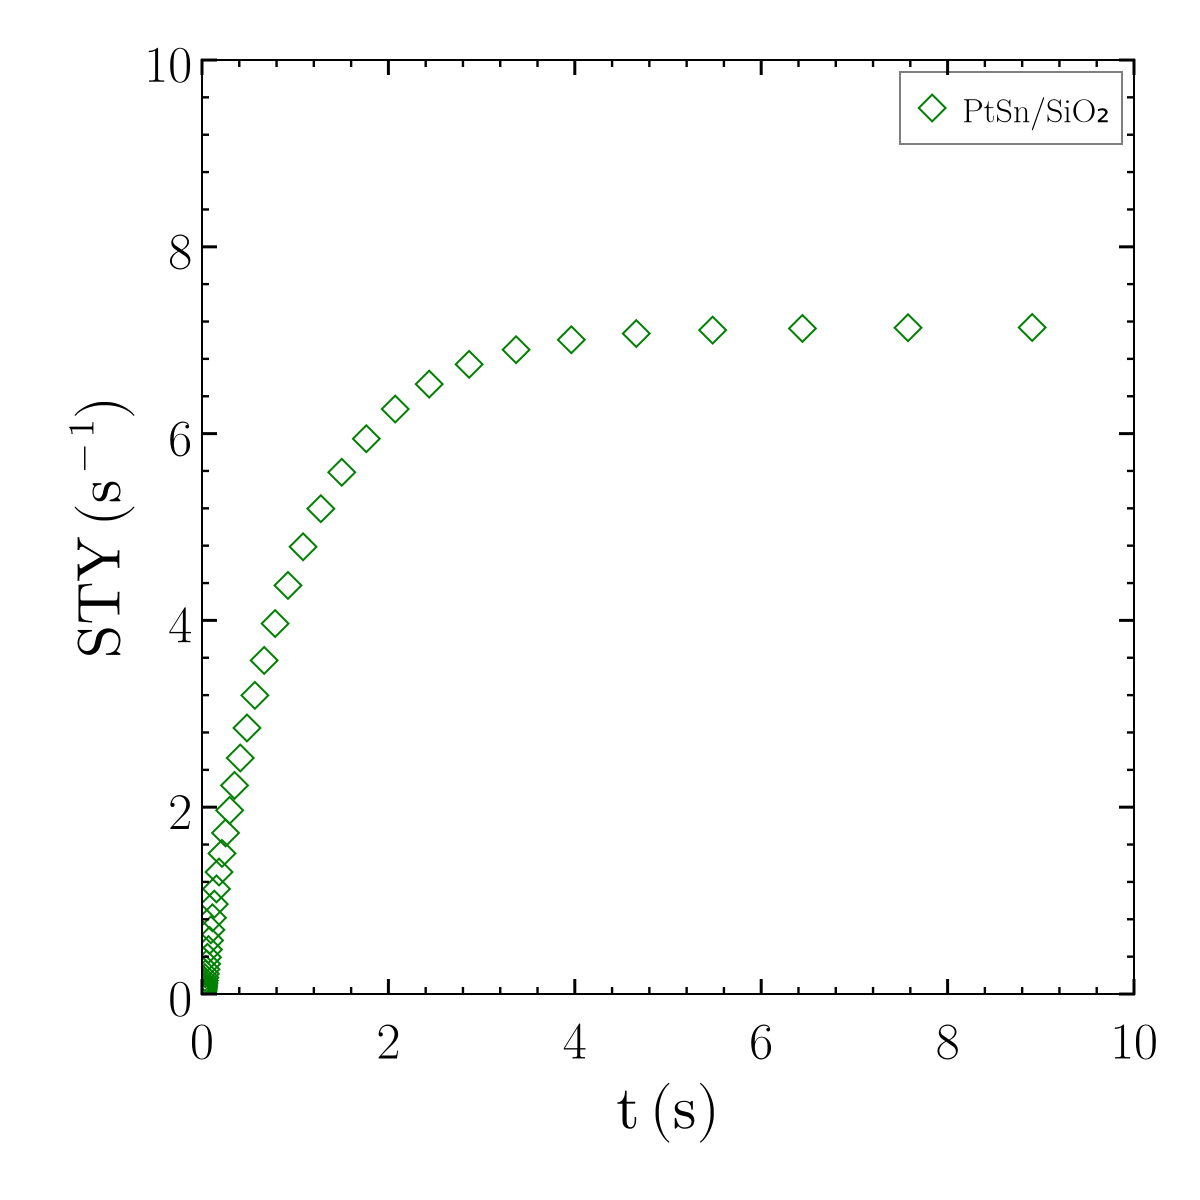

At Steady State, over PtSn/SiO₂, we observe: 
FA = 1.00E+05 s⁻¹ 
FB = 2.00E+05 s⁻¹ 
FC = 7.137 s⁻¹ 
XA = 7.14E-05 
r  ≈ 7.137 s⁻¹

In [27]:
###################################################################
# Display the graph and summarize some observations               #
###################################################################

display(fig3)
@printf("At Steady State, over PtSn/SiO₂, we observe: \n")
@printf("FA = %3.2E s⁻¹ \n", FA4[end]/NS0)
@printf("FB = %3.2E s⁻¹ \n", FB4[end]/NS0)
@printf("FC = %3.3f s⁻¹ \n", FC4[end]/NS0)
@printf("XA = %3.2E \n", XA4[end])
@printf("r  ≈ %3.3f s⁻¹", FC4[end]/NS0)

## Interpretation

A casual analysis would indicate to us that this is a very active catalyst. It approaches steady state within roughly 5 seconds and reaches a site time yield of approximately 7 inverse seconds, which we now take as an apparent turnover frequency. However, if this is the true turnover frequency, our system should have reached steady state within 1/7 seconds, and it took considerably longer. This should raise suspicions that some other dynamics are at play, so we look at the turnover number.

In [28]:
#######################################################
# Calculate the turnover number vs. time on stream    #
#######################################################

TON4 = cumul_integrate(t4, FC4/NS0)
TONspl4 = Spline1D(TON4, t4);

In [29]:
#######################################################
# Generate graph of TON vs. time on stream            #
#######################################################

set_theme!(theme_linear)
fig10 = Figure(size = (600, 600))
ax1  = Axis(fig10[1,1])
ax2  = Axis(fig10[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 5)
xtick_vals = collect(0:1:5.0)
ylim_vals  = (0, 10)
ytick_vals = collect(0:2:10)
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{t \, (s)}"
ax1.ylabel = L"\mathrm{TON}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, t4, TON4, label = "PtSn/SiO₂", marker = :diamond, markersize = 15, strokewidth = 1, strokecolor = :green, color = (:white, 0.0))
TOF4    = fit(t4[end-10:end], TON4[end-10:end], 1)[1]
hlines!(ax1, 1.0, 0, 10, color = :black, linestyle = :dash)
scatter!(ax1, TONspl4(1.0), 1.0, marker = :circle, markersize = 15, strokewidth = 1, strokecolor = :red, color = (:white,0.0))
axislegend(ax1, position = :rt, framevisible = true)
save("PtSnTON1.svg", fig10)
CairoMakie.activate!(type = "svg")
;

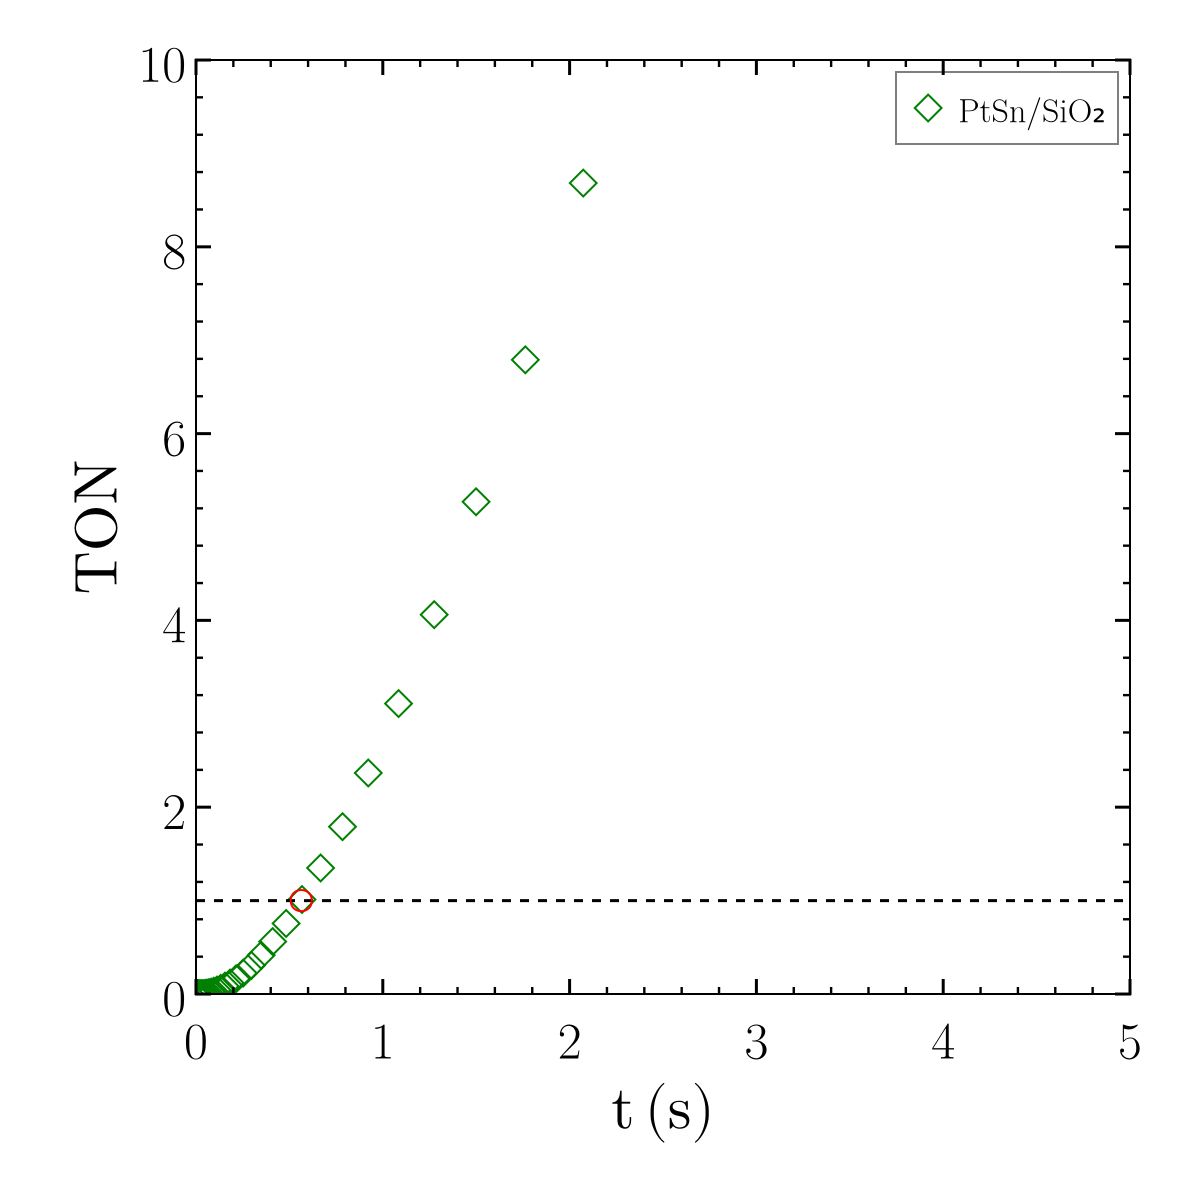

In [30]:
###########################################
# Display TON vs. time on stream for PtSn #
###########################################

display(fig10);

### Interpretation

Based on the initial number of active sites and the rate of product formation, I would conclude that the system should have reached steady state within roughly 0.7 seconds, but it hasn't. I further note that this TON vs. time curve is not linear; rather, it has a positive second derivative, suggesting that the catalyst system is somehow become more active (induction) with time on stream. This could be due to restructuring, in situ changes in oxidation state, changes in dispersion, etc.

This case is a bit more challenging because I have no good way to extrapolate the STY to zero time on stream and correlate activity with my ex situ quantification of active site density.  Here, I would have to use another option.  Three useful ones would be to:

1. Perform post mortem chemisorption to get an understanding of the active site density at steady state (not under reaction conditions though)
2. Add a titrant in situ to try to estimate sites under reaction conditions.
3. SSITKA type (transient) methods can sometimes be used to quantify the number of surface species, which can provide an estimate of the site number under reaction conditions. The challenge is that the system needs to be operating at very high coverage under reaction conditions and have infinitely fast mass transfer, otherwise, this is a difficult quantity to interpret.

We will use the first two methods here.

In [31]:
########################################################
# Generate plot of STY vs. time on stream with TON = 1 #
########################################################

NS0 = 10 #moles of active sites
set_theme!(theme_linear)
fig3 = Figure(size = (600, 600))
ax1  = Axis(fig3[1,1])
ax2  = Axis(fig3[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 10)
xtick_vals = collect(0:2:10.0)
ylim_vals  = (0, 10)
ytick_vals = collect(0:2:10)
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{t \, (s)}"
ax1.ylabel = L"\mathrm{STY \, (s^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, t4, FC4/NS0, marker = :diamond, markersize = 15, strokewidth = 1, strokecolor = :green, color = (:white, 0.0))
vlines!(ax1, TONspl4(1.0), 0, 2.5, color = :black, linestyle = :dash)
save("PtSnDynamics2.svg", fig3)

CairoMakie.activate!(type = "svg")

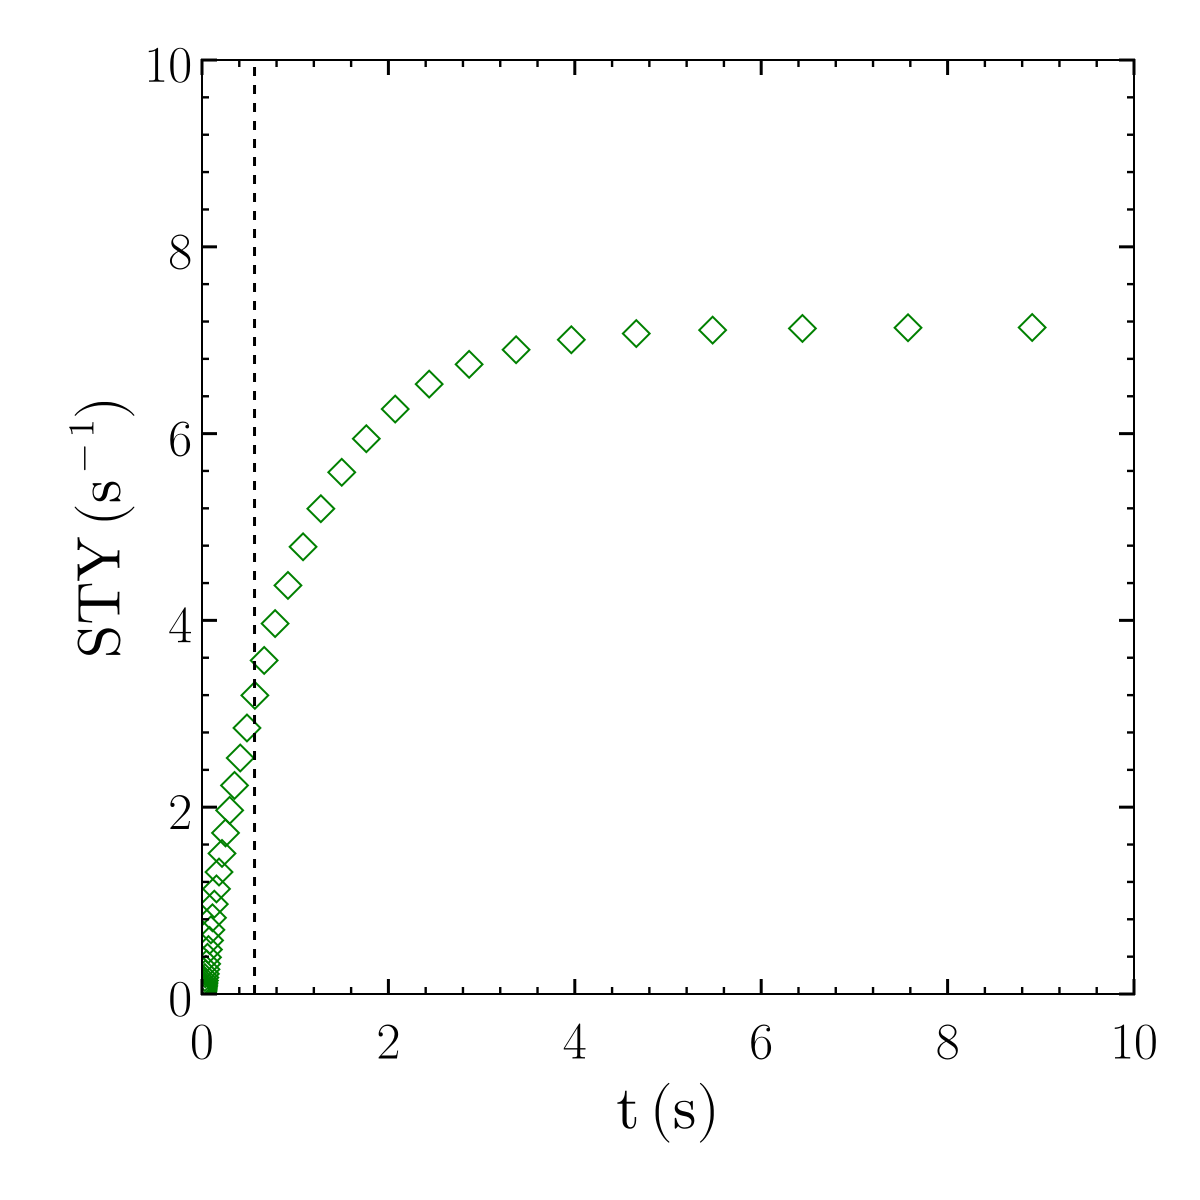

In [32]:
#######################################################
# Display graph of TON vs time on stream with TON = 1 #
#######################################################

display(fig3);

### Post mortem chemisorption

For this analysis, we allow the system to reach steady state (time invariant activity). Then we shut down the reactor, remove the catalyst, and perform a chemisorption experiment.  This post mortem characterization indicates that, at steady state, we have 375 moles of active sites inside the catalyst bed.  This is a substantial change from the 10 moles of active sites that we originally loaded into the bed.  We can normalize our steady state flow rate of product by this number and take it as an estimate of turnover frequency.

In [33]:
NS_SS = 365 + NS0 # moles of active sites
@printf("Before the experiment, chemisorption suggests that PtSn/SiO₂ had %6.2f moles of active sites \n", NS0)
@printf("After the experiment , chemisorption suggests that PtSn/SiO₂ has %3.2f moles of active sites \n", NS_SS)
@printf("At Steady State, PtSn/SiO₂ has a TOF of ≈ %3.3f s⁻¹", FC4[end]/NS_SS)

Before the experiment, chemisorption suggests that PtSn/SiO₂ had  10.00 moles of active sites 
After the experiment , chemisorption suggests that PtSn/SiO₂ has 375.00 moles of active sites 
At Steady State, PtSn/SiO₂ has a TOF of ≈ 0.190 s⁻¹

### In situ posioning

It is sometimes possible to add a strongly binding poison to the system. The purpose of this poison is to bind so strongly to the active sites that approaches a coverage of 1, occupies all sites, and renders the catalsyt inactive. By quantifying the amount of poison added to the system, one can determine the number of active sites under reaction conditions.

We first let the system reach steady state, and then we begin the flow of a titrant.  Some caveats:

1. The titrant flow should be small enough that it does not (over) titrate all active sites instantly. Rather, one wants to titrate sites over a discrete period of time during which both the effluent product flow and the titrant uptake can be monitored somehow.
2. It is best to couple this method with an analytical technique that can monitor both titrant flow and product flow from the reactor effluent. In a flow process, it is unlikely that 100% of the titrant added to the reactor will always be taken up by the catalyst, so it is necessary to quantify titrant uptake and not only product flowrate.  GC methods are OK, but they are limited by the chromatography time scae (minutes). If possible, use things like UV, IR, MS, etc. which permit a continuous analysis of the effluent and some resolution of species based on spectroscopic signatures.
3. It is difficult to find titrants that bind so strongly that they exclude all other adsorption under reaction conditions.  Some common choices might be CO for metals or pyridines for acid sites, but one should check to determine the validity of the 100% coverage assumption.
4. One might imagine using something like H2S for metals, but be cautious when using extremely strong binding species as they may contaminate an apparatus and lead to problems down the road.

In [34]:
##########################################################
# Generate graph of STY vs. time on stream               #
##########################################################

set_theme!(theme_linear)
fig3 = Figure(size = (600, 600))
ax1  = Axis(fig3[1,1])
ax2  = Axis(fig3[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 100)
xtick_vals = collect(0:20:100.0)
ylim_vals  = (0, 100)
ytick_vals = collect(0:20:100)
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{t \, (s)}"
ax1.ylabel = L"\mathrm{F_C \,\, (mol \,\, s^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, t5, FC5, label = "PtSn/SiO₂", marker = :diamond, markersize = 15, strokewidth = 1, strokecolor = :green, color = (:white, 0.0))
axislegend(ax1, position = :rt, framevisible = true)
save("PtSnSS.svg", fig3)

CairoMakie.activate!(type = "svg")

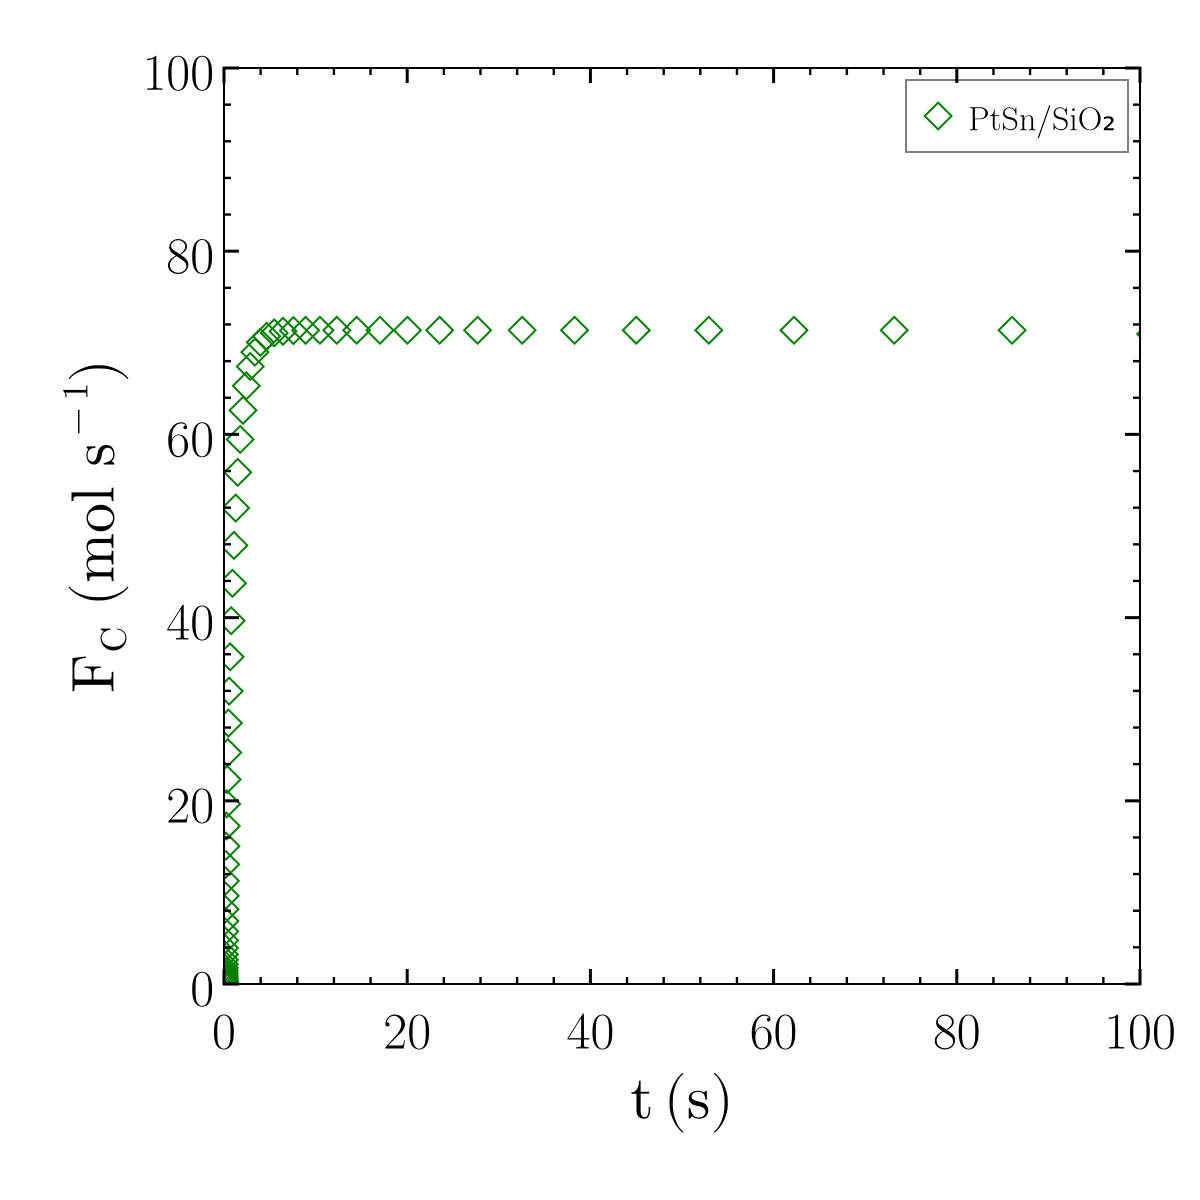

In [35]:
display(fig3);

In [36]:
###################################################################
# Generate graph after starting titrant flow                      #
###################################################################

set_theme!(theme_linear)
fig3 = Figure(size = (600, 600))
ax1  = Axis(fig3[1,1])
ax2  = Axis(fig3[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 1000)
xtick_vals = collect(0:200:1000.0)
ylim_vals  = (0, 100)
ytick_vals = collect(0:20:100)
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{t \, (s)}"
ax1.ylabel = L"\mathrm{F_C \,\, (mol \,\, s^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

scatter!(ax1, t5, FC5, label = "PtSn/SiO₂ + 1 mol/s poison @ 100s", marker = :diamond, markersize = 15, strokewidth = 1, strokecolor = :green, color = (:white, 0.0))
axislegend(ax1, position = :rt, framevisible = true)
save("PtSnPoison.svg", fig3)
CairoMakie.activate!(type = "svg")
;

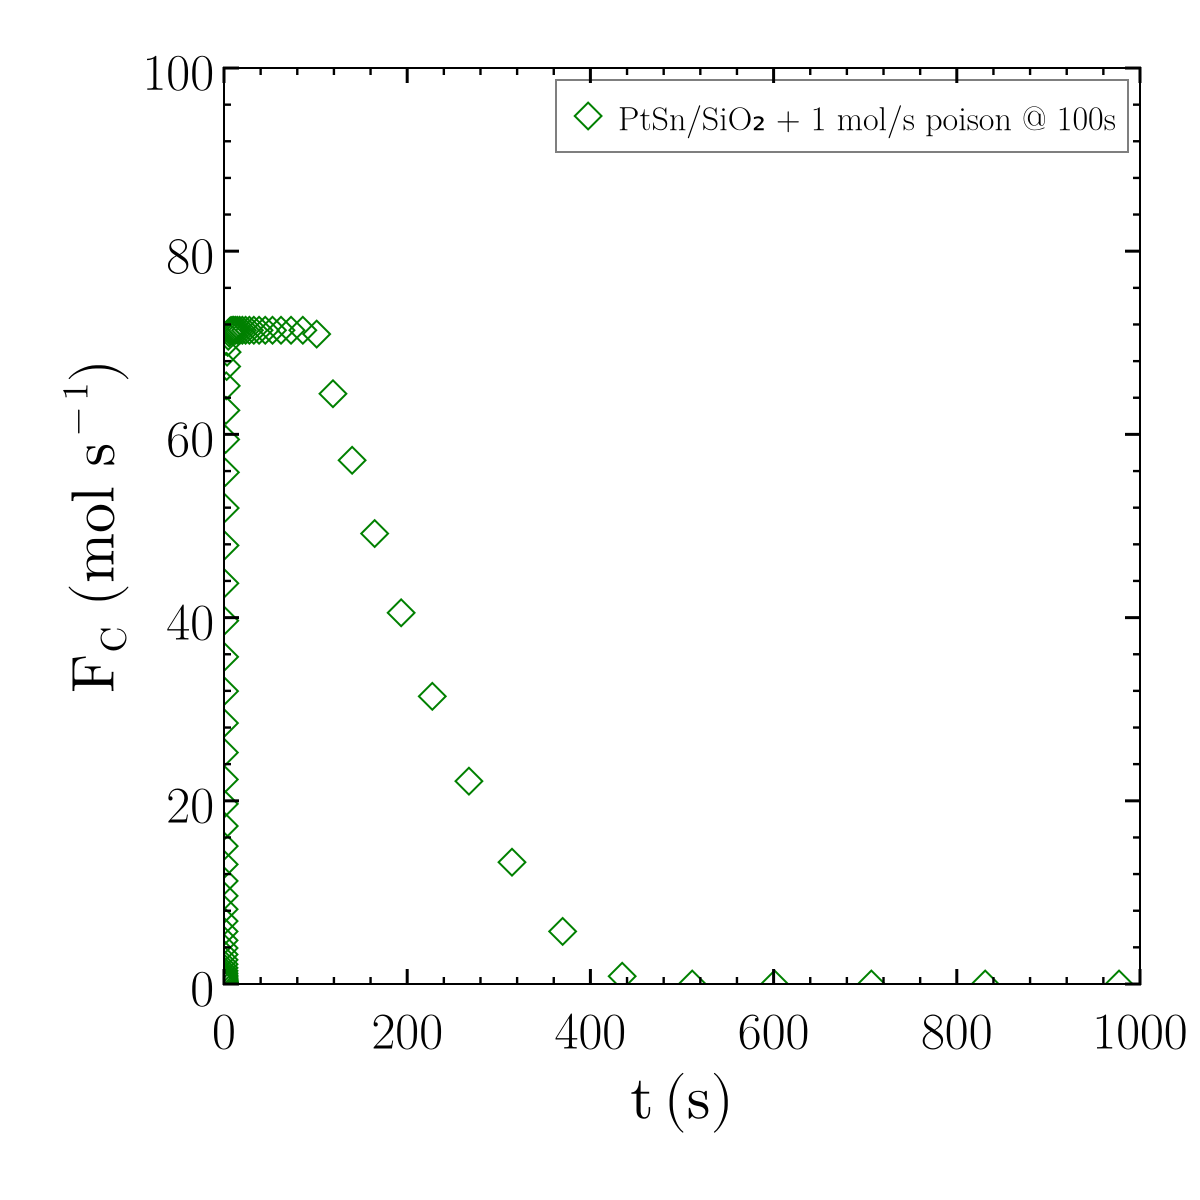

In [37]:
display(fig3);

### Observations

We can see that after starting titrant addition at 100s, we eventually suppress product formation entirely.  Because we have quantified titrant flow in the effluent, we can also visualize trends in titrant uptake. In the graph below, we plot titrant uptake rate, which we define as the different between titrant feed flowrate and titrant effluent flowrate.  If we integrate the uptake rate as a function of time, we obtain the total number of titrant molecules adsorbed by the catalyst. We can often take this number as a good estimate of the active site density under reaction conditions.

$$N_S = \int_{t_s}^{t_e} (F_{P,f} - F_{P}) dt$$

In [38]:
##################################################################
# Find the time when titrant flowrate again equals feed flowrate #  
##################################################################

findfirst(FP5 .>= 0.999)

##################################################################
# Graph rate of titrant uptake vs. time on stream                #
##################################################################

set_theme!(theme_linear)
fig3 = Figure(size = (600, 600))
ax1  = Axis(fig3[1,1])
ax2  = Axis(fig3[1,1], yaxisposition = :right, xaxisposition = :top)

#Adjustable Figure properties
xlim_vals  = (0, 1000)
xtick_vals = collect(0:200:1000.0)
ylim_vals  = (-0.0001, 2)
ytick_vals = collect(0:0.5:2)
xscale_val = identity
yscale_val = identity

ax1.xlabel = L"\mathrm{t \, (s)}"
ax1.ylabel = L"\mathrm{(F_{P,f} - F_{P}) \,\, (mol \,\, s^{-1})}"

ax2.xticklabelsvisible = false
ax2.yticklabelsvisible = false

#Automatically updating Figure properties based on above
xlims!(ax1, xlim_vals)
xlims!(ax2, xlim_vals)

ylims!(ax1, ylim_vals)
ylims!(ax2, ylim_vals)

ax1.xscale = xscale_val
ax2.xscale = xscale_val

ax1.yscale = yscale_val
ax2.yscale = yscale_val

ax1.xticks = xtick_vals
ax2.xticks = xtick_vals

ax1.yticks = ytick_vals
ax2.yticks = ytick_vals

# scatter!(ax1, t5, 1 .- FP5, label = "poison uptake over PtSn/SiO₂", marker = :diamond, markersize = 10, strokewidth = 1, strokecolor = :black, color = (:white, 100.0))
poly!(Point2f[(100, 0), (100, 1), (t5[138], 1), (t5[139], 0)], color = (:grey90, 0.3), strokecolor = (:white, 0.0), strokewidth = 1)
lines!(ax1, t5[t5 .>= 100], 1 .- FP5[t5 .>= 100], label = "poison uptake over PtSn/SiO₂", linewidth = 1, color = :black)

#vlines!(ax1, TONspl4(1.0), 0, 2.5, color = :black, linestyle = :dash)

CairoMakie.activate!(type = "svg")
save("PtSnUptake.svg", fig3)
SITES = NumericalIntegration.integrate(t5[t5 .>= 100], (1 .- FP5)[t5 .>= 100])
;

In situ titration suggests this catalyst has 371.7 moles of active sites at steady state. 
The molar flowrate of product out of the reactor is 71.4 mol/s. 
We can therefore estimate a TOF of r ≈ 0.192 s⁻¹.

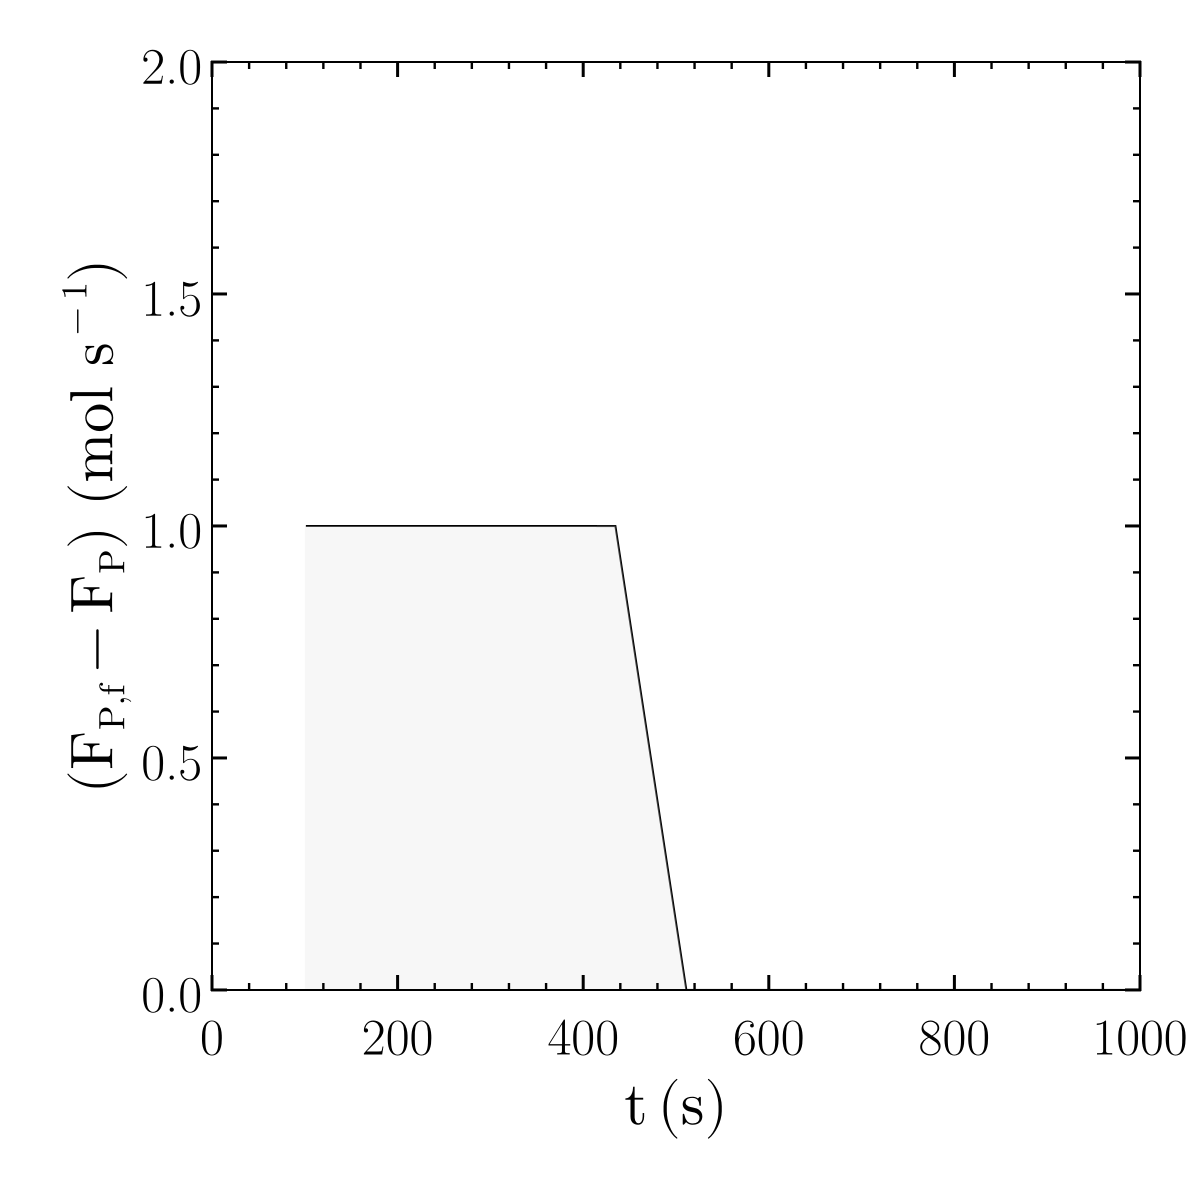

In [39]:
##############################################################################
# Display results of the analysis                                            #
##############################################################################

@printf("In situ titration suggests this catalyst has %3.1f moles of active sites at steady state. \n", SITES)
@printf("The molar flowrate of product out of the reactor is %3.1f mol/s. \n", FC4[end])
@printf("We can therefore estimate a TOF of r ≈ %3.3f s⁻¹.", FC4[end]/SITES)
display(fig3);